# Social Media Time-Wasters Analysis
## Data Science Project - CSE437

**Objective:** Analyze time-wasting behavior on social media platforms and its effects based on various demographic and behavioral factors.

**Dataset Features:**
- Demographics: Age, Gender, Location, Profession
- Platform: Instagram, TikTok, YouTube, Facebook
- Behavioral: Watch Reason, Device Type, Connection Type, Current Activity
- Impact Measures: Addiction Level, Self Control, Productivity Loss, Satisfaction

---

## 1. Import Required Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

# Plot styles
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


## 2. Helper Functions for Analysis and Visualization

In [3]:
def visualize_null_values(df, title="Visualization of Null Values"):
    """
    Create a heatmap visualization of null values in the dataset
    """
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print null value statistics
    print(f"\n{title}")
    print("-" * 60)
    print("\nNull values count per column:")
    null_counts = df.isnull().sum()
    if null_counts.sum() == 0:
        print("✓ No null values found!")
    else:
        print(null_counts[null_counts > 0])
        print("\nPercentage of null values per column:")
        print((null_counts[null_counts > 0] / len(df) * 100).round(2))

def analyze_and_visualize_dataset(df, title="Dataset Analysis"):
    """
    Comprehensive dataset analysis and visualization
    """
    print(f"\n{'='*70}")
    print(f"{title}")
    print("="*70)
    print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    
    print("\nColumn Names and Types:")
    print(df.dtypes)
    
    print("\nFirst 5 rows:")
    print(df.head())
    
    print("\nStatistical Summary:")
    print(df.describe())
    
    print("\nMissing Values Summary:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("✓ No missing values!")
    else:
        print(missing[missing > 0])

    # Distribution plots for numerical columns
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    numerical_cols = numerical_df.columns
    
    if len(numerical_cols) > 0:
        n_cols = 3
        n_rows = (len(numerical_cols) - 1) // n_cols + 1
        fig_height = 4 * n_rows
        
        plt.figure(figsize=(15, fig_height))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.histplot(df[col].dropna(), kde=True, color='steelblue')
            plt.title(f'Distribution of {col}', fontsize=10, fontweight='bold')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

print("Helper functions loaded successfully!")

Helper functions loaded successfully!


## 3. Load and Explore the Main Dataset
### Time-Wasters on Social Media Dataset

In [4]:
# Load the main dataset
data = pd.read_csv('Datasets/Time-Wasters on Social Media.csv')

# Basic dataset information
print("="*70)
print("TIME-WASTERS ON SOCIAL MEDIA DATASET")
print("="*70)
print(f"Dataset Shape: {data.shape[0]:,} rows × {data.shape[1]} columns")
print(f"\nTotal Users Analyzed: {data['UserID'].nunique():,}")

print("\nColumn Names:")
for i, col in enumerate(data.columns, 1):
    print(f"  {i:2}. {col}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
data.head()

TIME-WASTERS ON SOCIAL MEDIA DATASET
Dataset Shape: 1,000 rows × 31 columns

Total Users Analyzed: 1,000

Column Names:
   1. UserID
   2. Age
   3. Gender
   4. Location
   5. Income
   6. Debt
   7. Owns Property
   8. Profession
   9. Demographics
  10. Platform
  11. Total Time Spent
  12. Number of Sessions
  13. Video ID
  14. Video Category
  15. Video Length
  16. Engagement
  17. Importance Score
  18. Time Spent On Video
  19. Number of Videos Watched
  20. Scroll Rate
  21. Frequency
  22. ProductivityLoss
  23. Satisfaction
  24. Watch Reason
  25. DeviceType
  26. OS
  27. Watch Time
  28. Self Control
  29. Addiction Level
  30. CurrentActivity
  31. ConnectionType

First 5 rows of the dataset:


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


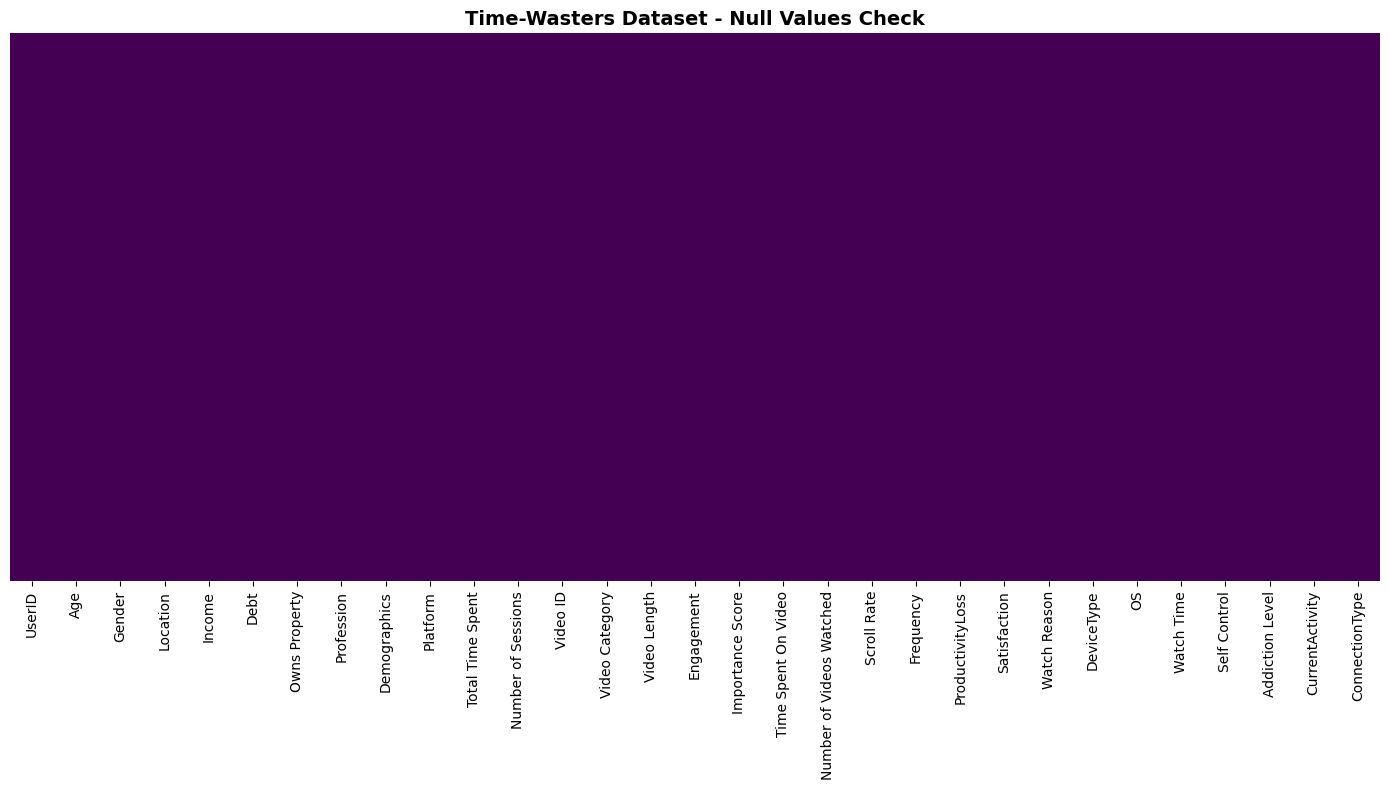


Time-Wasters Dataset - Null Values Check
------------------------------------------------------------

Null values count per column:
✓ No null values found!

Time-Wasters Dataset - Comprehensive Analysis
Dataset Shape: 1,000 rows × 31 columns

Column Names and Types:
UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   obj

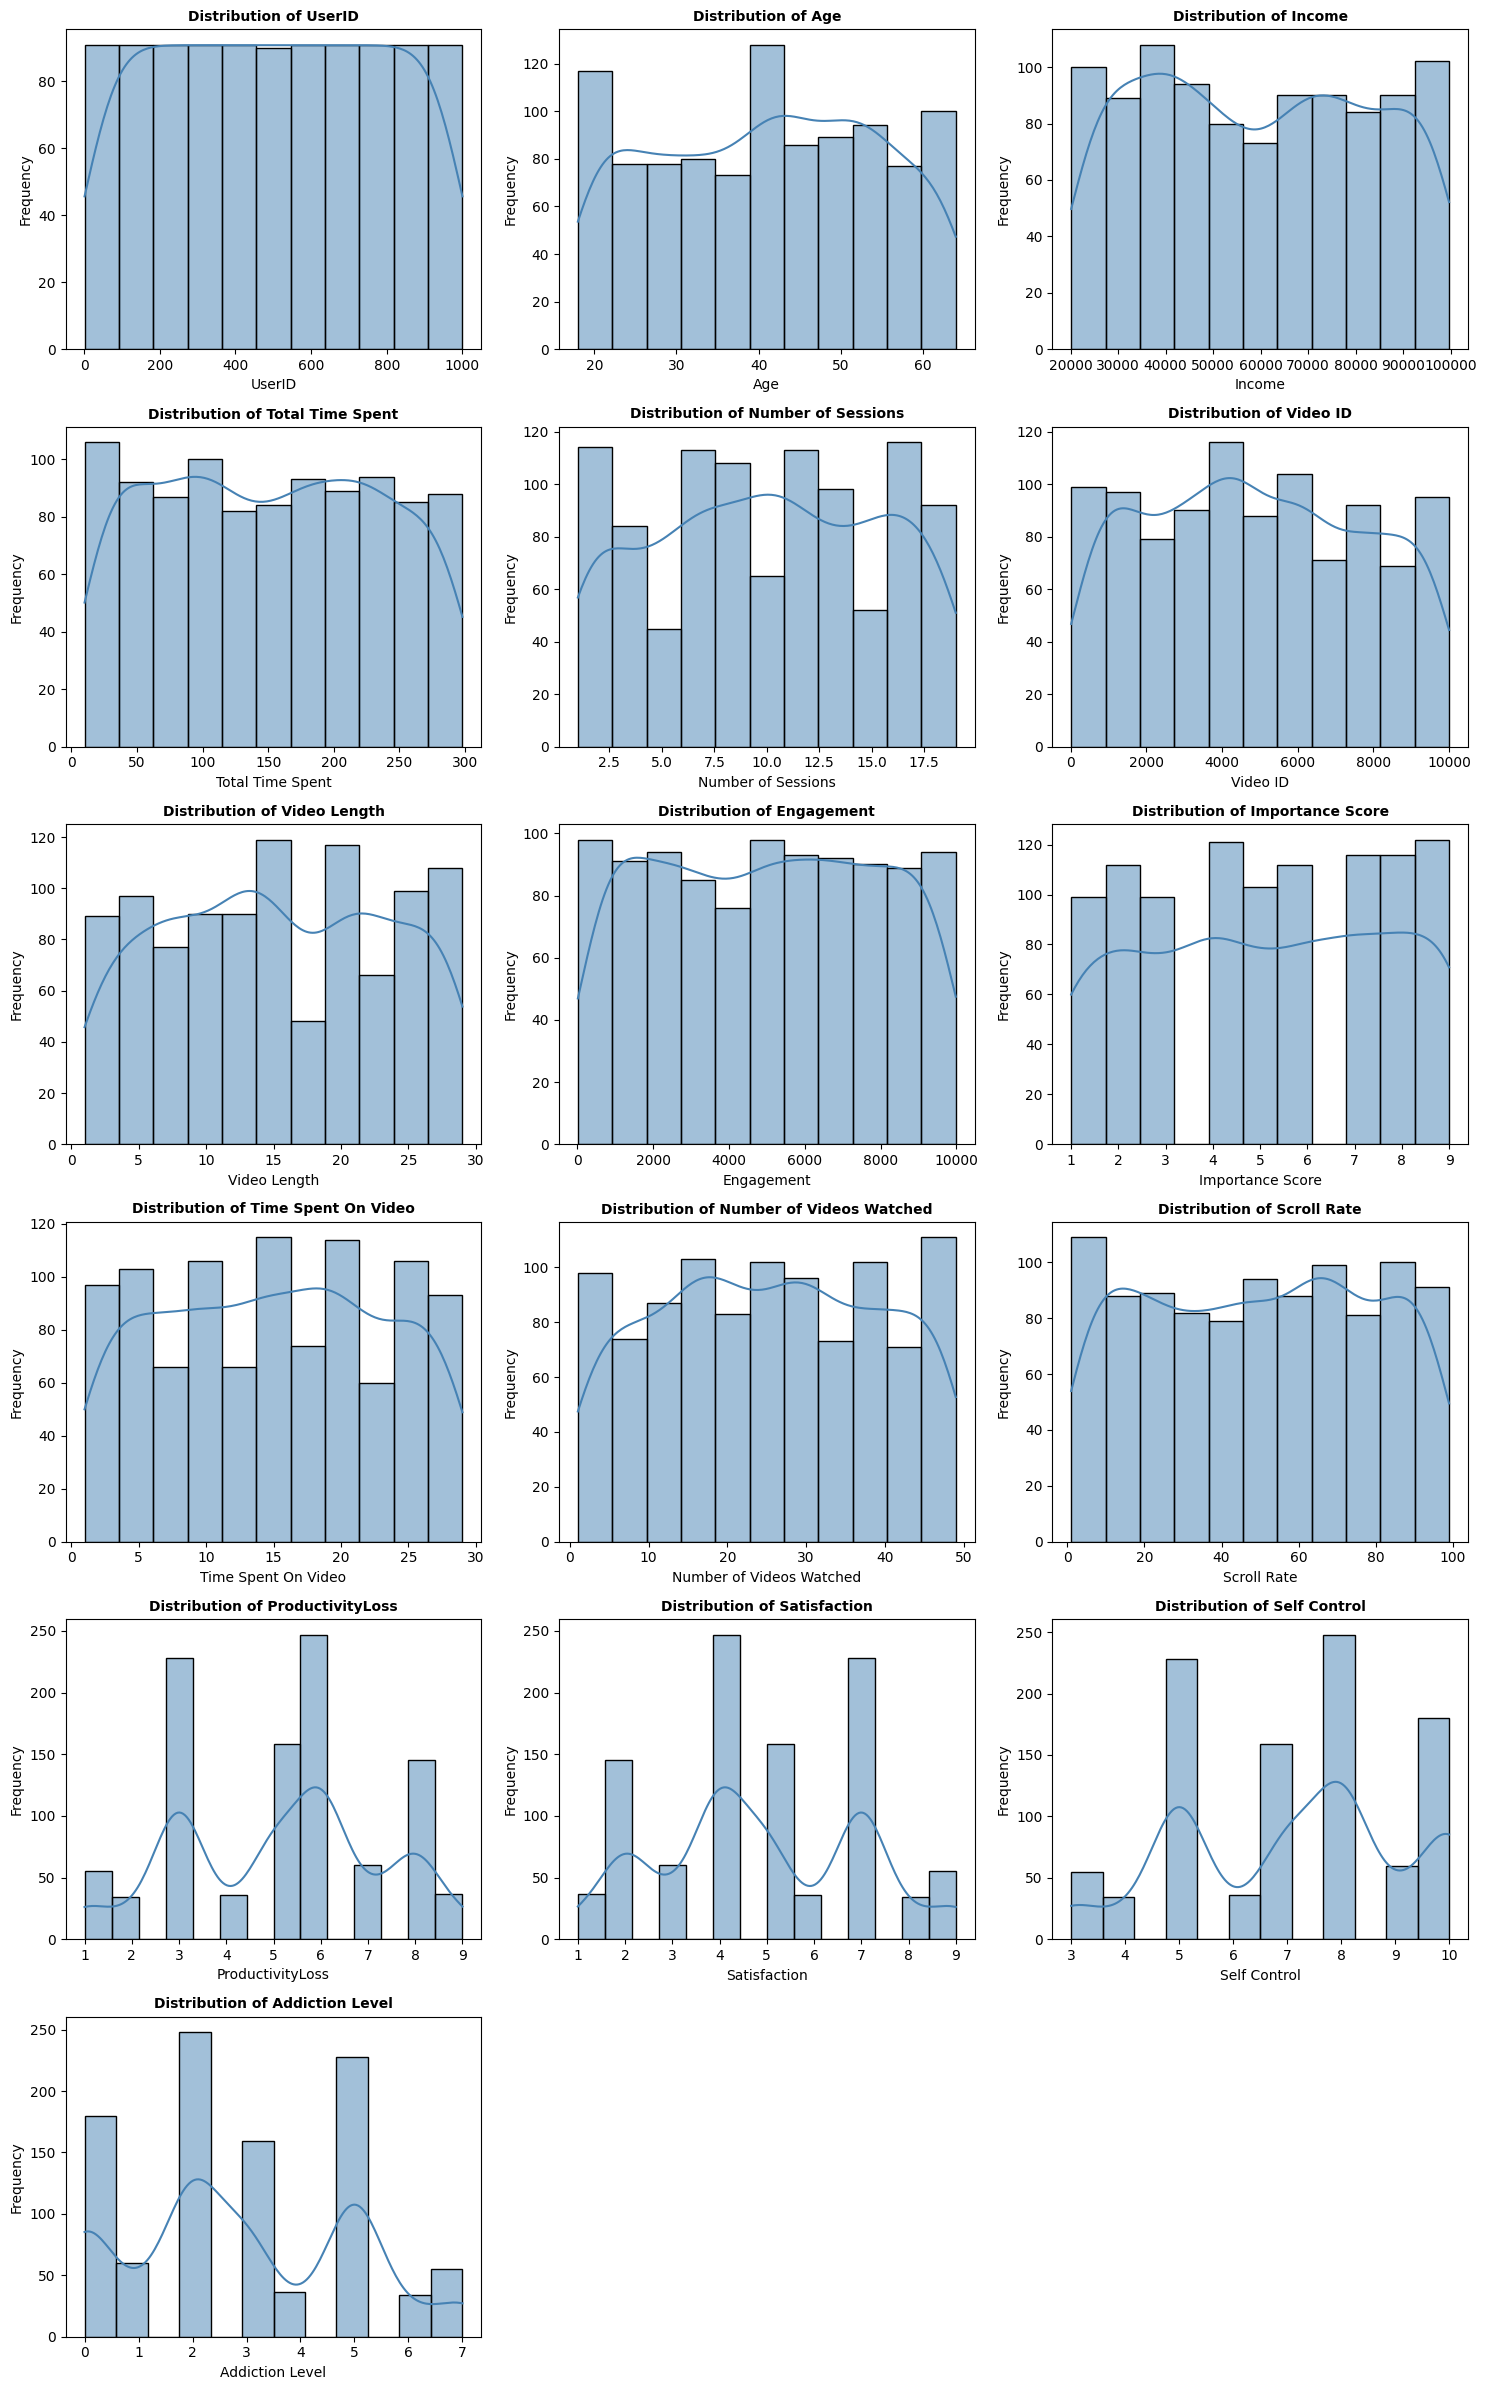

In [5]:
# Comprehensive analysis of the dataset
visualize_null_values(data, "Time-Wasters Dataset - Null Values Check")
analyze_and_visualize_dataset(data, "Time-Wasters Dataset - Comprehensive Analysis")

## 4. Exploratory Data Analysis (EDA)
### 4.1 Key Demographics Analysis

In [7]:
# Analyze key demographic features
print("="*70)
print("DEMOGRAPHIC ANALYSIS")
print("="*70)

# Age Distribution
print("\nAge Statistics:")
print(data['Age'].describe())

# Gender Distribution
print("\nGender Distribution:")
gender_dist = data['Gender'].value_counts()
for gender, count in gender_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {gender}: {count:,} ({pct:.1f}%)")

# Location Distribution
print("\nTop 10 Locations:")
location_dist = data['Location'].value_counts().head(10)
for loc, count in location_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {loc}: {count:,} ({pct:.1f}%)")

# Profession Distribution
print("\nProfession Distribution:")
profession_dist = data['Profession'].value_counts()
for prof, count in profession_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {prof}: {count:,} ({pct:.1f}%)")

DEMOGRAPHIC ANALYSIS

Age Statistics:
count    1000.000000
mean       40.986000
std        13.497852
min        18.000000
25%        29.000000
50%        42.000000
75%        52.000000
max        64.000000
Name: Age, dtype: float64

Gender Distribution:
  Male: 514 (51.4%)
  Female: 322 (32.2%)
  Other: 164 (16.4%)

Top 10 Locations:
  India: 228 (22.8%)
  United States: 174 (17.4%)
  Vietnam: 82 (8.2%)
  Barzil: 78 (7.8%)
  Philippines: 78 (7.8%)
  Indonesia: 77 (7.7%)
  Pakistan: 76 (7.6%)
  Japan: 75 (7.5%)
  Mexico: 73 (7.3%)
  Germany: 59 (5.9%)

Profession Distribution:
  Students: 246 (24.6%)
  Waiting staff: 194 (19.4%)
  Labor/Worker: 186 (18.6%)
  driver: 113 (11.3%)
  Engineer: 65 (6.5%)
  Cashier: 56 (5.6%)
  Manager: 54 (5.4%)
  Artist: 47 (4.7%)
  Teacher: 39 (3.9%)


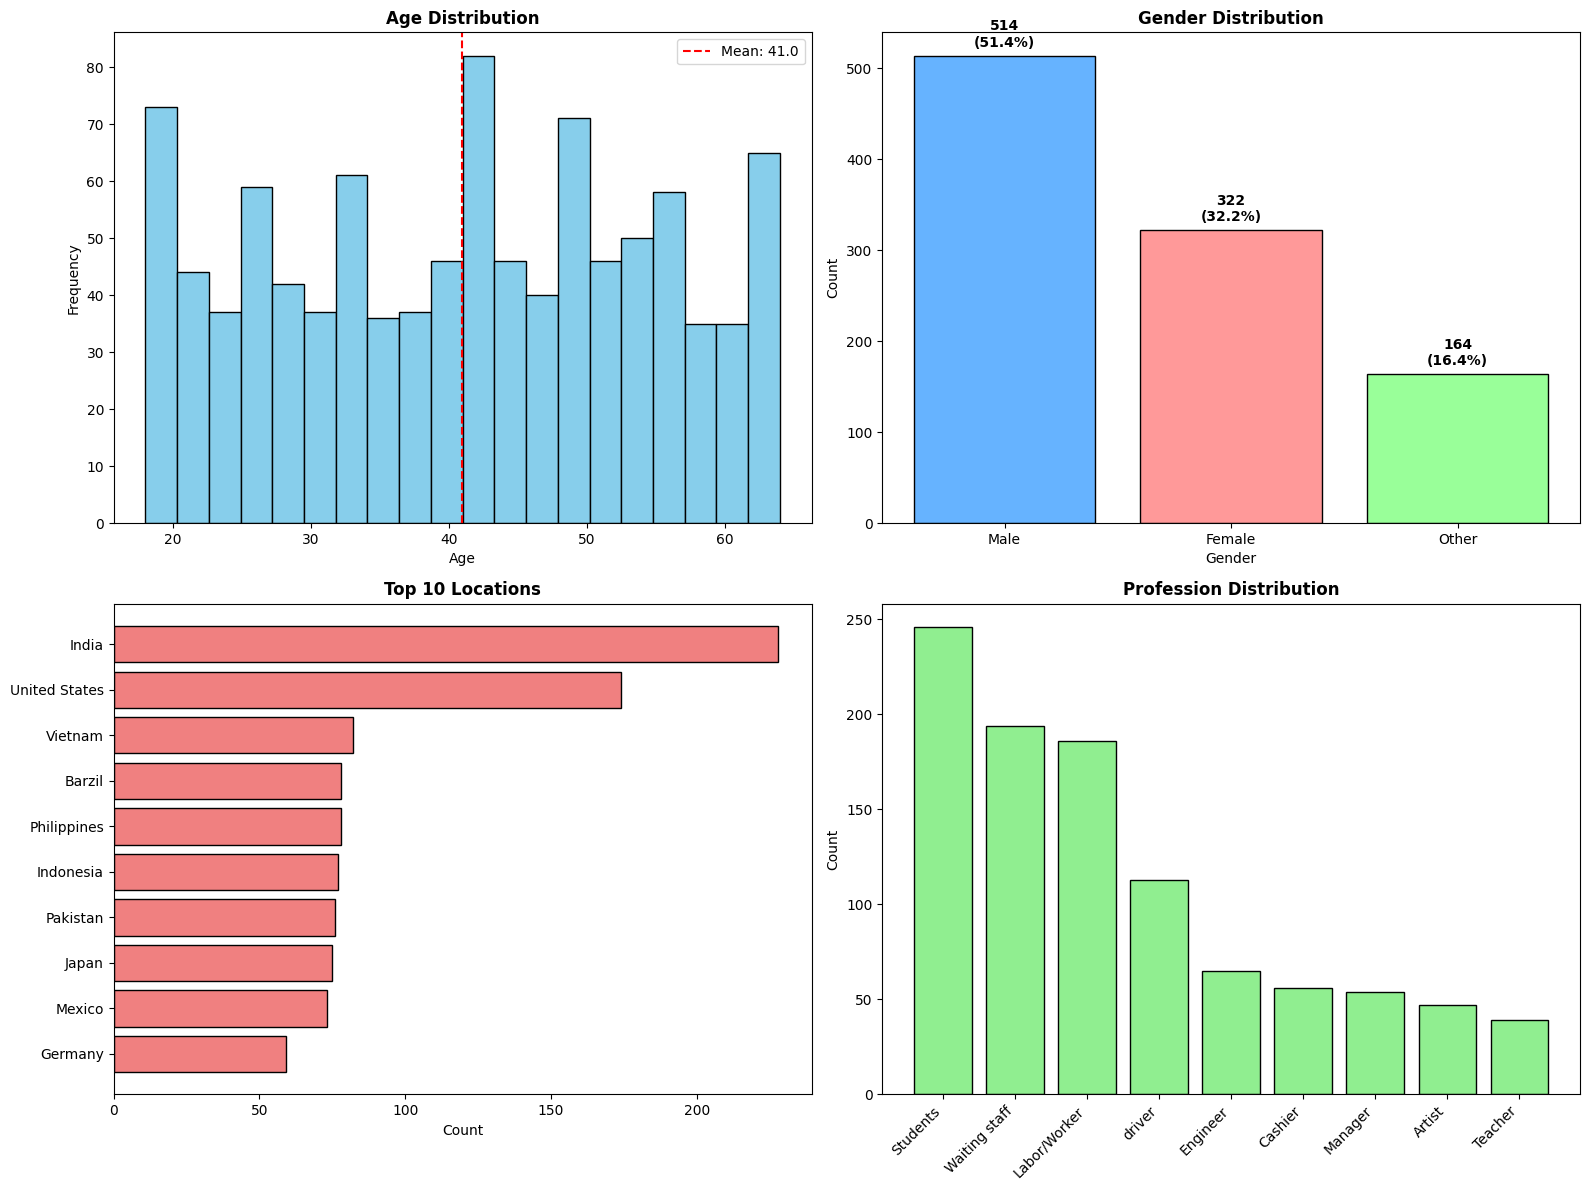

In [8]:
# Visualize demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Distribution
axes[0, 0].hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(data['Age'].mean(), color='red', linestyle='--', label=f'Mean: {data["Age"].mean():.1f}')
axes[0, 0].legend()

# Gender Distribution
gender_counts = data['Gender'].value_counts()
colors_gender = ['#66b3ff', '#ff9999', '#99ff99']
axes[0, 1].bar(gender_counts.index, gender_counts.values, color=colors_gender, edgecolor='black')
axes[0, 1].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
for i, (idx, val) in enumerate(gender_counts.items()):
    axes[0, 1].text(i, val + 10, f'{val}\n({val/len(data)*100:.1f}%)', ha='center', fontweight='bold')

# Top Locations
top_locations = data['Location'].value_counts().head(10)
axes[1, 0].barh(range(len(top_locations)), top_locations.values, color='lightcoral', edgecolor='black')
axes[1, 0].set_yticks(range(len(top_locations)))
axes[1, 0].set_yticklabels(top_locations.index)
axes[1, 0].set_title('Top 10 Locations', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].invert_yaxis()

# Profession Distribution
profession_counts = data['Profession'].value_counts()
axes[1, 1].bar(range(len(profession_counts)), profession_counts.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_xticks(range(len(profession_counts)))
axes[1, 1].set_xticklabels(profession_counts.index, rotation=45, ha='right')
axes[1, 1].set_title('Profession Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 4.2 Platform and Usage Analysis

In [11]:
# Platform Usage Analysis
print("="*70)
print("PLATFORM USAGE ANALYSIS")
print("="*70)

# Platform Distribution
print("\nPlatform Distribution:")
platform_dist = data['Platform'].value_counts()
for platform, count in platform_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {platform}: {count:,} ({pct:.1f}%)")

# Time Spent Statistics by Platform
print("\nAverage Time Spent by Platform:")
platform_time = data.groupby('Platform')['Total Time Spent'].agg(['mean', 'median', 'std'])
print(platform_time.round(2))

# Device Type Distribution
print("\nDevice Type Distribution:")
device_dist = data['DeviceType'].value_counts()
for device, count in device_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {device}: {count:,} ({pct:.1f}%)")

# Connection Type Distribution
print("\nConnection Type Distribution:")
connection_dist = data['ConnectionType'].value_counts()
for conn, count in connection_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {conn}: {count:,} ({pct:.1f}%)")

PLATFORM USAGE ANALYSIS

Platform Distribution:
  TikTok: 273 (27.3%)
  Instagram: 256 (25.6%)
  YouTube: 250 (25.0%)
  Facebook: 221 (22.1%)

Average Time Spent by Platform:
             mean  median    std
Platform                        
Facebook   155.18   160.0  80.92
Instagram  146.91   141.0  86.31
TikTok     151.27   153.0  83.86
YouTube    152.82   156.5  84.53

Device Type Distribution:
  Smartphone: 585 (58.5%)
  Tablet: 283 (28.3%)
  Computer: 132 (13.2%)

Connection Type Distribution:
  Mobile Data: 686 (68.6%)
  Wi-Fi: 314 (31.4%)


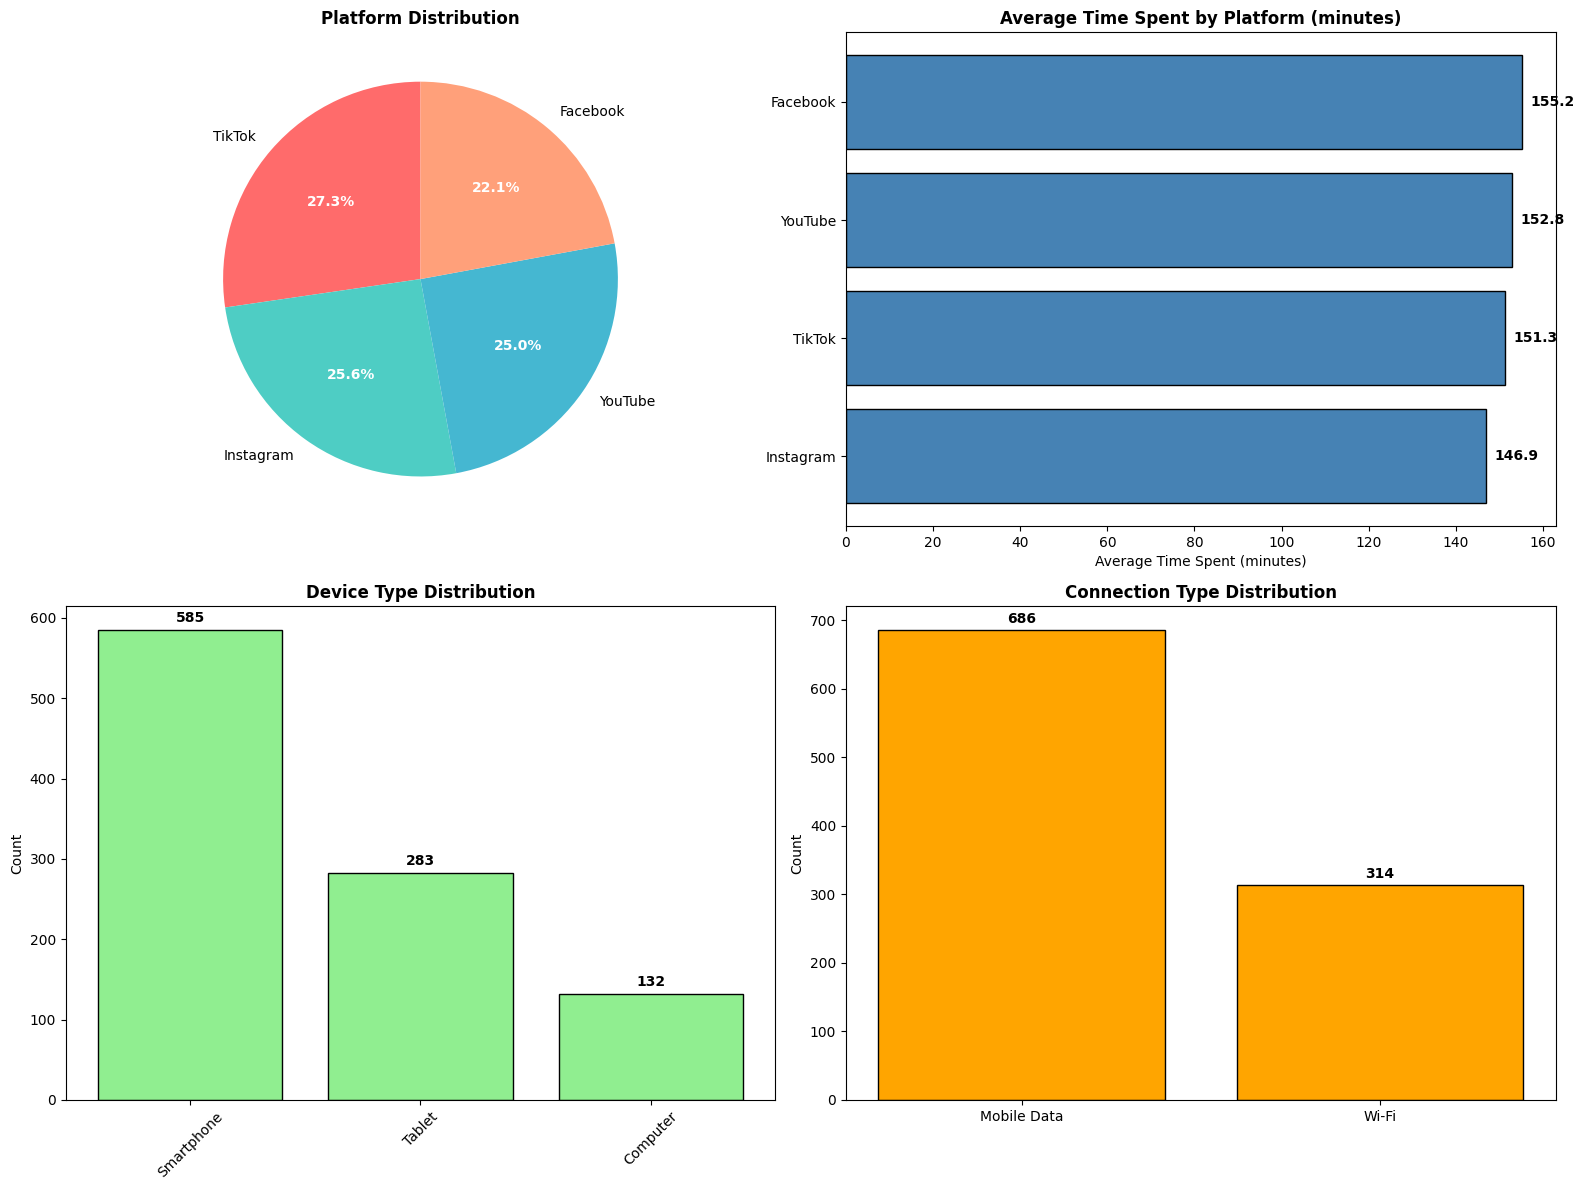

In [12]:
# Visualize platform usage patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Platform Distribution
platform_counts = data['Platform'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
wedges, texts, autotexts = axes[0, 0].pie(platform_counts.values, labels=platform_counts.index, 
                                            autopct='%1.1f%%', colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[0, 0].set_title('Platform Distribution', fontsize=12, fontweight='bold')

# Time Spent by Platform
platform_time_avg = data.groupby('Platform')['Total Time Spent'].mean().sort_values()
axes[0, 1].barh(platform_time_avg.index, platform_time_avg.values, color='steelblue', edgecolor='black')
axes[0, 1].set_title('Average Time Spent by Platform (minutes)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Average Time Spent (minutes)')
for i, v in enumerate(platform_time_avg.values):
    axes[0, 1].text(v + 2, i, f'{v:.1f}', va='center', fontweight='bold')

# Device Type Distribution
device_counts = data['DeviceType'].value_counts()
axes[1, 0].bar(device_counts.index, device_counts.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Device Type Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, (idx, val) in enumerate(device_counts.items()):
    axes[1, 0].text(i, val + 10, f'{val}', ha='center', fontweight='bold')

# Connection Type Distribution
connection_counts = data['ConnectionType'].value_counts()
axes[1, 1].bar(connection_counts.index, connection_counts.values, color='orange', edgecolor='black')
axes[1, 1].set_title('Connection Type Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')
for i, (idx, val) in enumerate(connection_counts.items()):
    axes[1, 1].text(i, val + 10, f'{val}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3 Behavioral Analysis - Watch Reason & Current Activity

BEHAVIORAL ANALYSIS

Watch Reason Distribution:
  Habit: 339 (33.9%)
  Boredom: 277 (27.7%)
  Entertainment: 264 (26.4%)
  Procrastination: 120 (12.0%)

Current Activity Distribution:
  At home: 381 (38.1%)
  At school: 271 (27.1%)
  At work: 234 (23.4%)
  Commuting: 114 (11.4%)


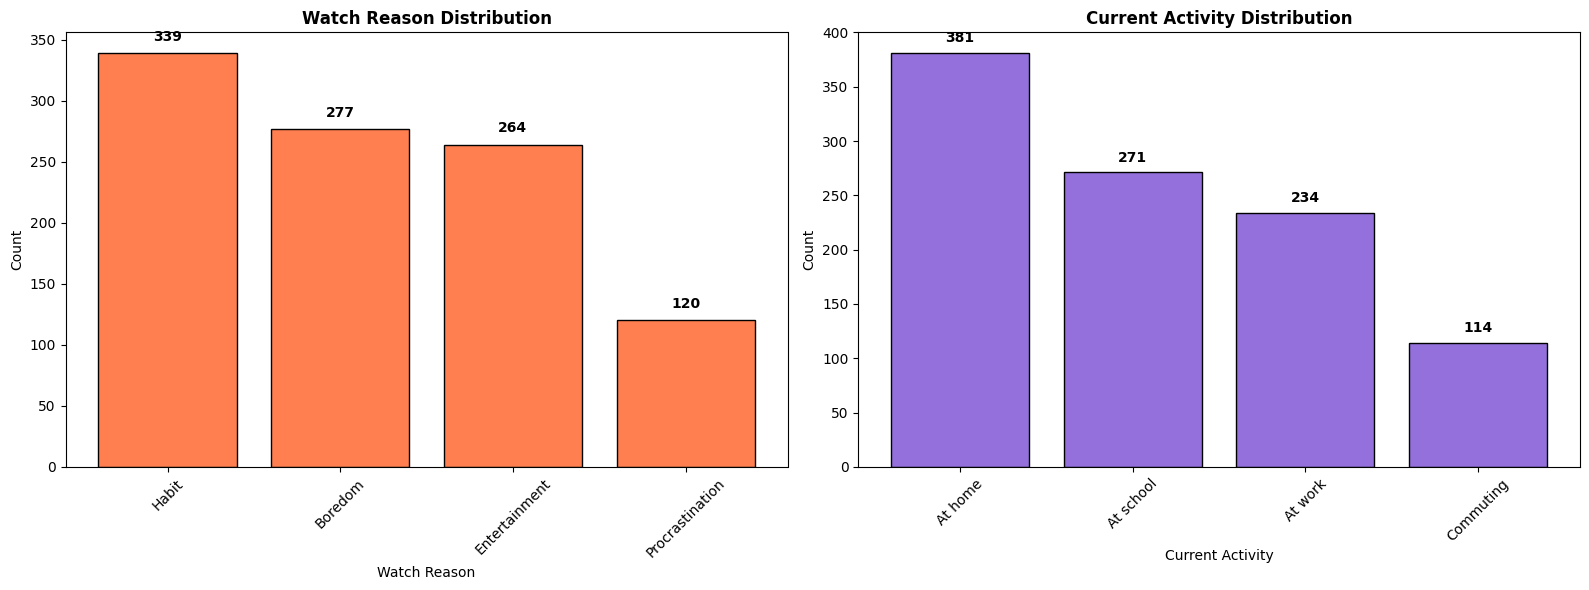

In [13]:
# Behavioral Analysis
print("="*70)
print("BEHAVIORAL ANALYSIS")
print("="*70)

# Watch Reason Distribution
print("\nWatch Reason Distribution:")
watch_reason_dist = data['Watch Reason'].value_counts()
for reason, count in watch_reason_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {reason}: {count:,} ({pct:.1f}%)")

# Current Activity Distribution
print("\nCurrent Activity Distribution:")
activity_dist = data['CurrentActivity'].value_counts()
for activity, count in activity_dist.items():
    pct = (count / len(data)) * 100
    print(f"  {activity}: {count:,} ({pct:.1f}%)")

# Visualize behavioral patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Watch Reason
watch_counts = data['Watch Reason'].value_counts()
axes[0].bar(watch_counts.index, watch_counts.values, color='coral', edgecolor='black')
axes[0].set_title('Watch Reason Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Watch Reason')
axes[0].tick_params(axis='x', rotation=45)
for i, (idx, val) in enumerate(watch_counts.items()):
    axes[0].text(i, val + 10, f'{val}', ha='center', fontweight='bold')

# Current Activity
activity_counts = data['CurrentActivity'].value_counts()
axes[1].bar(activity_counts.index, activity_counts.values, color='mediumpurple', edgecolor='black')
axes[1].set_title('Current Activity Distribution', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Current Activity')
axes[1].tick_params(axis='x', rotation=45)
for i, (idx, val) in enumerate(activity_counts.items()):
    axes[1].text(i, val + 10, f'{val}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.4 Impact Analysis - Addiction Level & Self Control

In [14]:
# Impact Analysis - KEY FOCUS AREAS
print("="*70)
print("IMPACT ANALYSIS - ADDICTION & SELF CONTROL")
print("="*70)

# Addiction Level Distribution
print("\nAddiction Level Distribution:")
addiction_dist = data['Addiction Level'].value_counts().sort_index()
for level, count in addiction_dist.items():
    pct = (count / len(data)) * 100
    print(f"  Level {level}: {count:,} ({pct:.1f}%)")

print(f"\nAddiction Level Statistics:")
print(f"  Mean: {data['Addiction Level'].mean():.2f}")
print(f"  Median: {data['Addiction Level'].median():.1f}")
print(f"  Std Dev: {data['Addiction Level'].std():.2f}")

# Self Control Distribution
print("\nSelf Control Distribution:")
control_dist = data['Self Control'].value_counts().sort_index()
for level, count in control_dist.items():
    pct = (count / len(data)) * 100
    print(f"  Level {level}: {count:,} ({pct:.1f}%)")

print(f"\nSelf Control Statistics:")
print(f"  Mean: {data['Self Control'].mean():.2f}")
print(f"  Median: {data['Self Control'].median():.1f}")
print(f"  Std Dev: {data['Self Control'].std():.2f}")

# Productivity Loss Distribution
print("\nProductivity Loss Distribution:")
prod_loss_dist = data['ProductivityLoss'].value_counts().sort_index()
for level, count in prod_loss_dist.items():
    pct = (count / len(data)) * 100
    print(f"  Level {level}: {count:,} ({pct:.1f}%)")

IMPACT ANALYSIS - ADDICTION & SELF CONTROL

Addiction Level Distribution:
  Level 0: 180 (18.0%)
  Level 1: 60 (6.0%)
  Level 2: 248 (24.8%)
  Level 3: 159 (15.9%)
  Level 4: 36 (3.6%)
  Level 5: 228 (22.8%)
  Level 6: 34 (3.4%)
  Level 7: 55 (5.5%)

Addiction Level Statistics:
  Mean: 2.91
  Median: 3.0
  Std Dev: 2.06

Self Control Distribution:
  Level 3: 55 (5.5%)
  Level 4: 34 (3.4%)
  Level 5: 228 (22.8%)
  Level 6: 36 (3.6%)
  Level 7: 159 (15.9%)
  Level 8: 248 (24.8%)
  Level 9: 60 (6.0%)
  Level 10: 180 (18.0%)

Self Control Statistics:
  Mean: 7.09
  Median: 7.0
  Std Dev: 2.06

Productivity Loss Distribution:
  Level 1: 55 (5.5%)
  Level 2: 34 (3.4%)
  Level 3: 228 (22.8%)
  Level 4: 36 (3.6%)
  Level 5: 158 (15.8%)
  Level 6: 247 (24.7%)
  Level 7: 60 (6.0%)
  Level 8: 145 (14.5%)
  Level 9: 37 (3.7%)


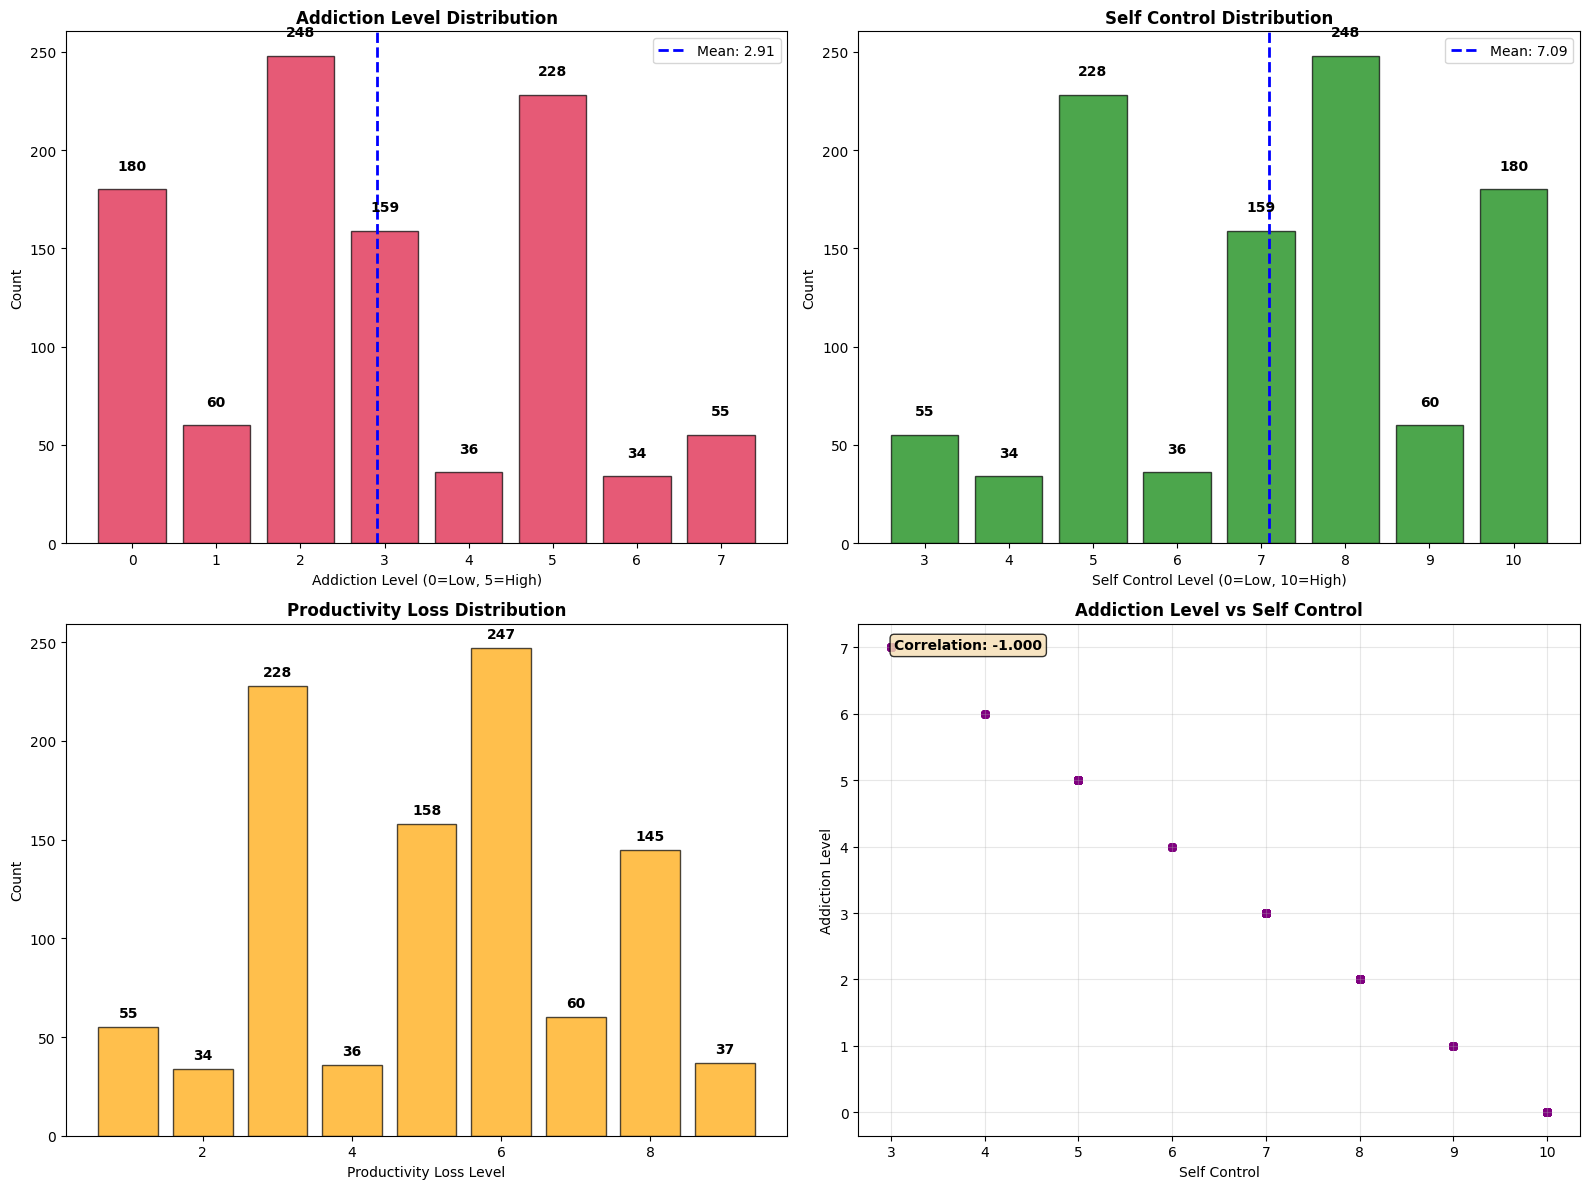

In [15]:
# Visualize impact metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Addiction Level Distribution
addiction_counts = data['Addiction Level'].value_counts().sort_index()
axes[0, 0].bar(addiction_counts.index, addiction_counts.values, color='crimson', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Addiction Level Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Addiction Level (0=Low, 5=High)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(data['Addiction Level'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {data["Addiction Level"].mean():.2f}')
axes[0, 0].legend()
for i, (idx, val) in enumerate(addiction_counts.items()):
    axes[0, 0].text(idx, val + 10, f'{val}', ha='center', fontweight='bold')

# Self Control Distribution
control_counts = data['Self Control'].value_counts().sort_index()
axes[0, 1].bar(control_counts.index, control_counts.values, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Self Control Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Self Control Level (0=Low, 10=High)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(data['Self Control'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {data["Self Control"].mean():.2f}')
axes[0, 1].legend()
for i, (idx, val) in enumerate(control_counts.items()):
    axes[0, 1].text(idx, val + 10, f'{val}', ha='center', fontweight='bold')

# Productivity Loss Distribution
prod_loss_counts = data['ProductivityLoss'].value_counts().sort_index()
axes[1, 0].bar(prod_loss_counts.index, prod_loss_counts.values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Productivity Loss Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Productivity Loss Level')
axes[1, 0].set_ylabel('Count')
for i, (idx, val) in enumerate(prod_loss_counts.items()):
    axes[1, 0].text(idx, val + 5, f'{val}', ha='center', fontweight='bold')

# Relationship: Addiction vs Self Control
axes[1, 1].scatter(data['Self Control'], data['Addiction Level'], alpha=0.5, color='purple', s=30)
axes[1, 1].set_title('Addiction Level vs Self Control', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Self Control')
axes[1, 1].set_ylabel('Addiction Level')
axes[1, 1].grid(alpha=0.3)

# Calculate and display correlation
corr = data['Self Control'].corr(data['Addiction Level'])
axes[1, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1, 1].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontweight='bold')

plt.tight_layout()
plt.show()

### 4.5 Cross-Factor Analysis

In [17]:
# Analyze relationships between key factors
print("="*70)
print("CROSS-FACTOR ANALYSIS")
print("="*70)

# Addiction Level by Platform
print("\nAverage Addiction Level by Platform:")
platform_addiction = data.groupby('Platform')['Addiction Level'].mean().sort_values(ascending=False)
print(platform_addiction.round(2))

# Self Control by Age Group
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 35, 45, 55, 100], 
                            labels=['18-25', '26-35', '36-45', '46-55', '56+'])
print("\nAverage Self Control by Age Group:")
age_control = data.groupby('Age_Group')['Self Control'].mean()
print(age_control.round(2))

# Productivity Loss by Watch Reason
print("\nAverage Productivity Loss by Watch Reason:")
reason_prod = data.groupby('Watch Reason')['ProductivityLoss'].mean().sort_values(ascending=False)
print(reason_prod.round(2))

# Time Spent by Gender
print("\nAverage Time Spent by Gender:")
gender_time = data.groupby('Gender')['Total Time Spent'].mean().sort_values(ascending=False)
print(gender_time.round(2))

CROSS-FACTOR ANALYSIS

Average Addiction Level by Platform:
Platform
Facebook     2.98
Instagram    2.96
TikTok       2.91
YouTube      2.78
Name: Addiction Level, dtype: float64

Average Self Control by Age Group:
Age_Group
18-25    7.32
26-35    7.07
36-45    6.95
46-55    7.13
56+      7.03
Name: Self Control, dtype: float64

Average Productivity Loss by Watch Reason:
Watch Reason
Boredom            5.31
Entertainment      5.19
Procrastination    5.02
Habit              4.99
Name: ProductivityLoss, dtype: float64

Average Time Spent by Gender:
Gender
Other     155.32
Male      151.98
Female    148.49
Name: Total Time Spent, dtype: float64


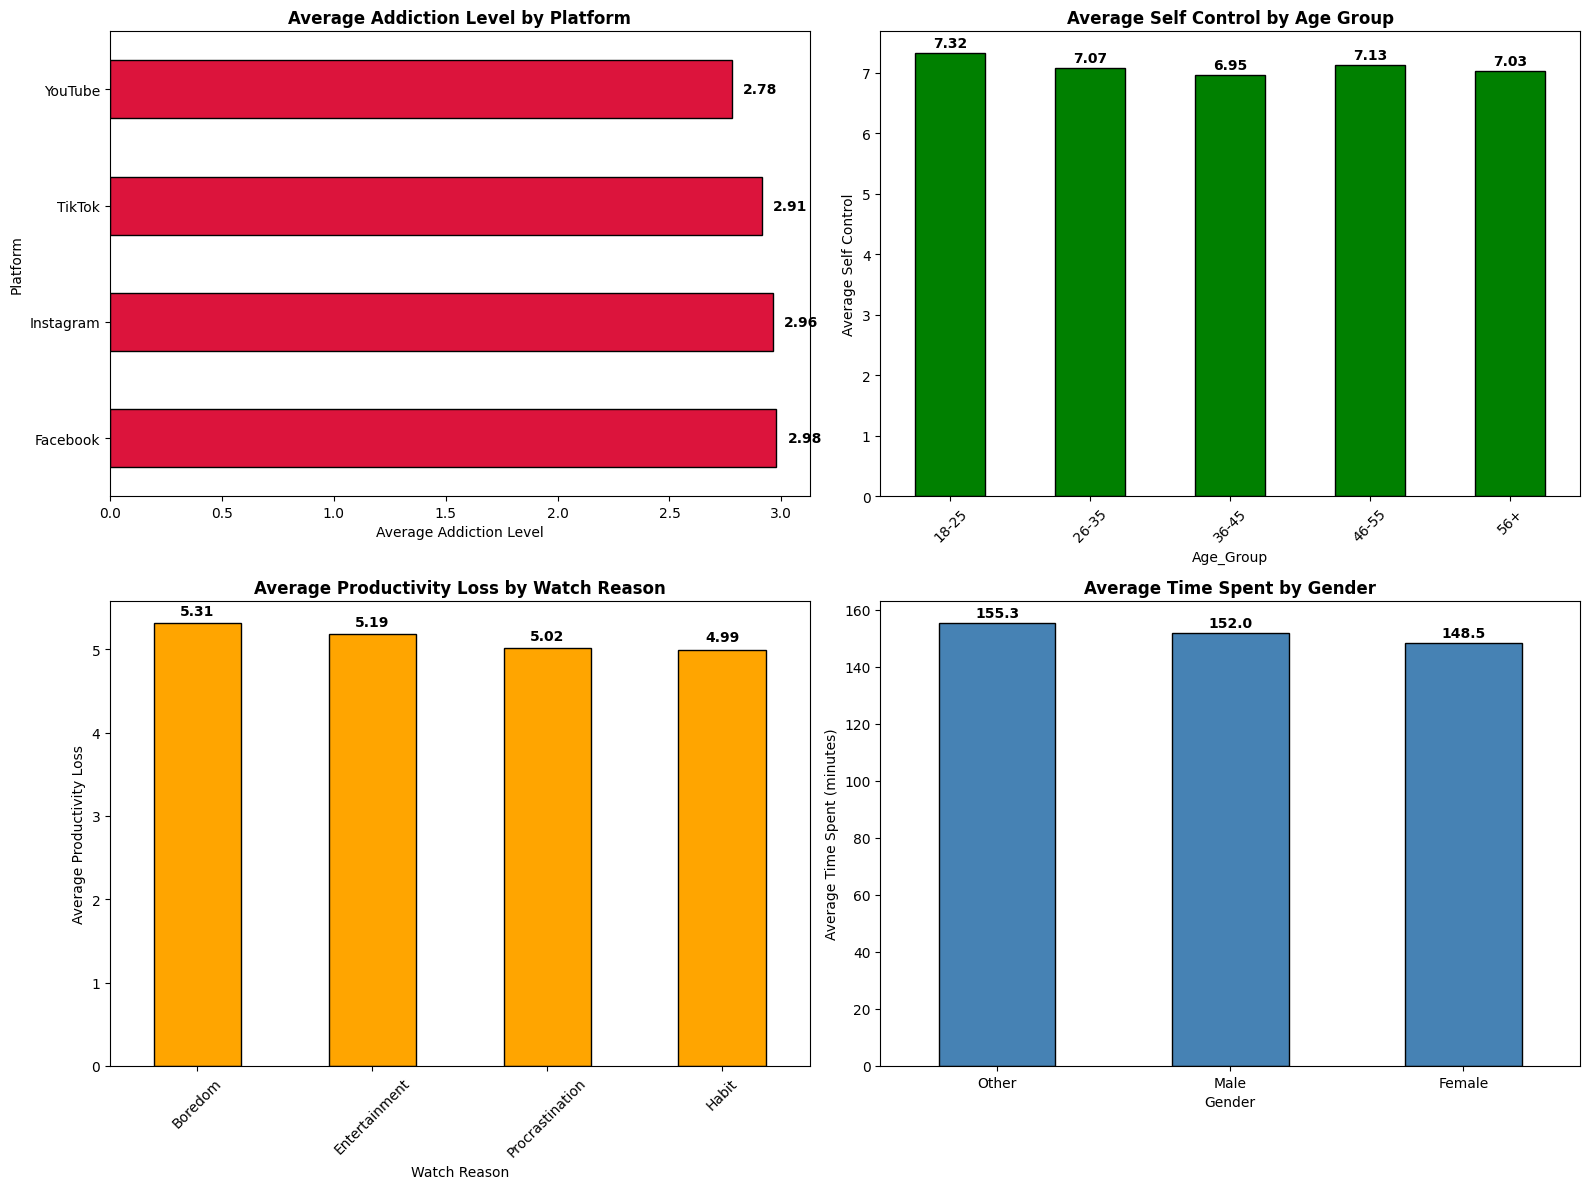

In [18]:
# Visualize cross-factor relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Addiction Level by Platform
platform_addiction.plot(kind='barh', ax=axes[0, 0], color='crimson', edgecolor='black')
axes[0, 0].set_title('Average Addiction Level by Platform', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Average Addiction Level')
for i, v in enumerate(platform_addiction.values):
    axes[0, 0].text(v + 0.05, i, f'{v:.2f}', va='center', fontweight='bold')

# Self Control by Age Group
age_control.plot(kind='bar', ax=axes[0, 1], color='green', edgecolor='black')
axes[0, 1].set_title('Average Self Control by Age Group', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Self Control')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(age_control.values):
    axes[0, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Productivity Loss by Watch Reason
reason_prod.plot(kind='bar', ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('Average Productivity Loss by Watch Reason', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Productivity Loss')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(reason_prod.values):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Time Spent by Gender
gender_time.plot(kind='bar', ax=axes[1, 1], color='steelblue', edgecolor='black')
axes[1, 1].set_title('Average Time Spent by Gender', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Time Spent (minutes)')
axes[1, 1].tick_params(axis='x', rotation=0)
for i, v in enumerate(gender_time.values):
    axes[1, 1].text(i, v + 2, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.6 Correlation Analysis

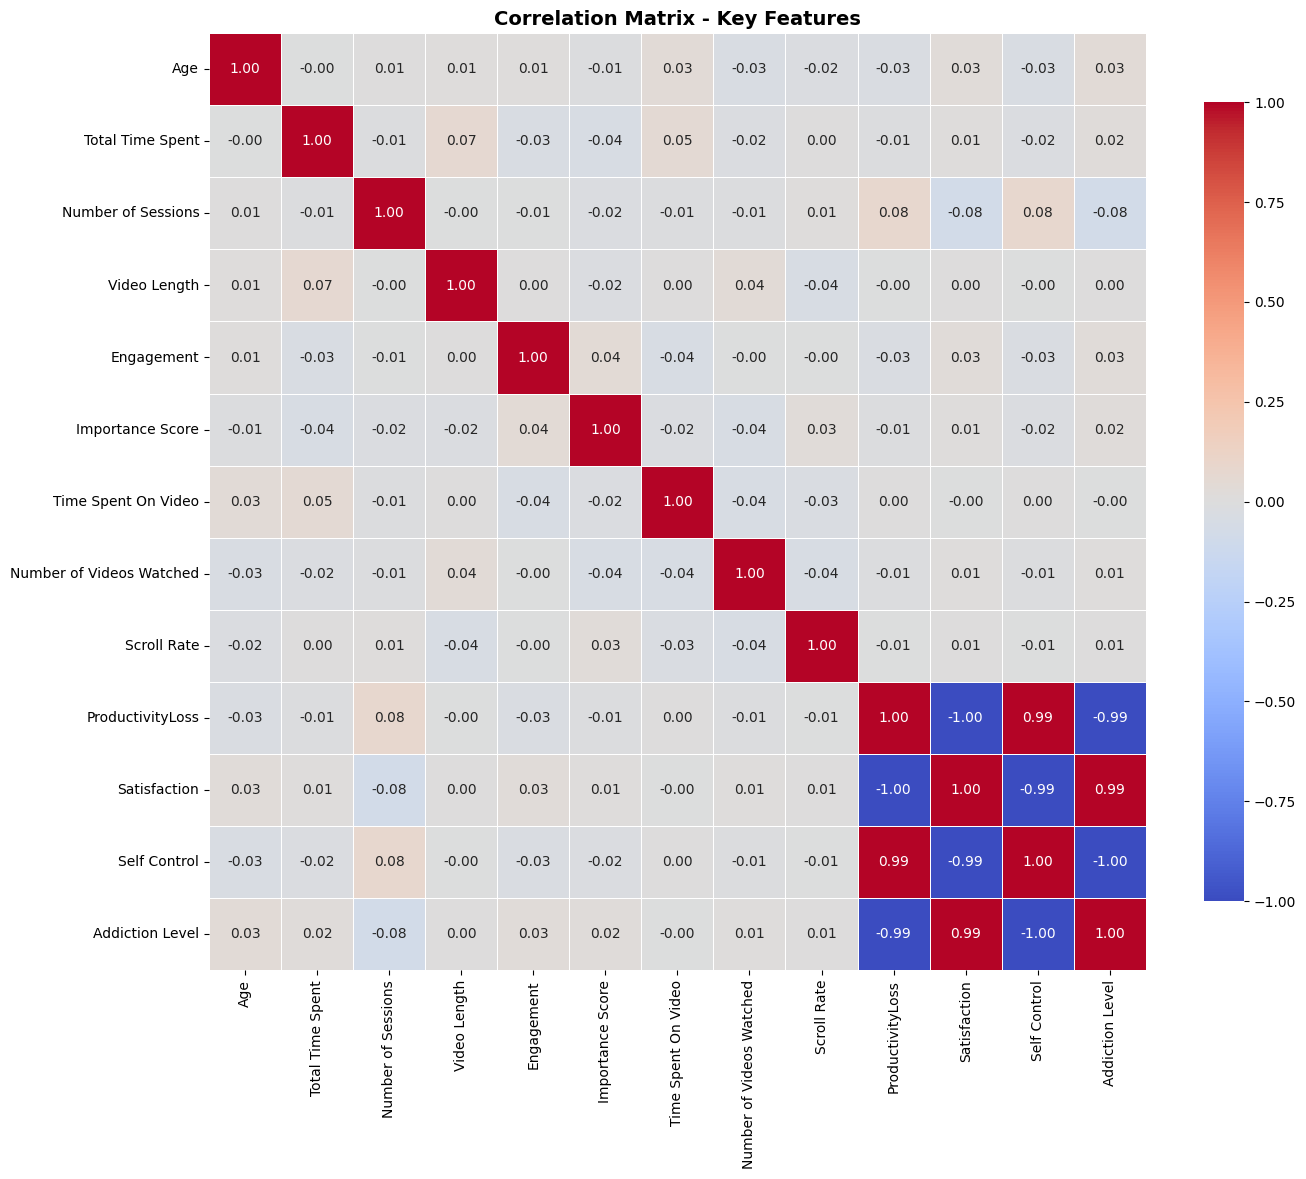

CORRELATIONS WITH ADDICTION LEVEL
Addiction Level             1.000000
Satisfaction                0.994939
Age                         0.033493
Engagement                  0.027620
Importance Score            0.018474
Total Time Spent            0.016086
Number of Videos Watched    0.013286
Scroll Rate                 0.006758
Video Length                0.004914
Time Spent On Video        -0.000447
Number of Sessions         -0.080961
ProductivityLoss           -0.994939
Self Control               -1.000000
Name: Addiction Level, dtype: float64

CORRELATIONS WITH SELF CONTROL
Self Control                1.000000
ProductivityLoss            0.994939
Number of Sessions          0.080961
Time Spent On Video         0.000447
Video Length               -0.004914
Scroll Rate                -0.006758
Number of Videos Watched   -0.013286
Total Time Spent           -0.016086
Importance Score           -0.018474
Engagement                 -0.027620
Age                        -0.033493
Satisfac

In [19]:
# Correlation Analysis - Numerical Features
numerical_features = ['Age', 'Total Time Spent', 'Number of Sessions', 'Video Length', 
                      'Engagement', 'Importance Score', 'Time Spent On Video', 
                      'Number of Videos Watched', 'Scroll Rate', 'ProductivityLoss', 
                      'Satisfaction', 'Self Control', 'Addiction Level']

# Calculate correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs with Addiction Level
print("="*70)
print("CORRELATIONS WITH ADDICTION LEVEL")
print("="*70)
addiction_corr = correlation_matrix['Addiction Level'].sort_values(ascending=False)
print(addiction_corr)

# Find highly correlated feature pairs with Self Control
print("\n" + "="*70)
print("CORRELATIONS WITH SELF CONTROL")
print("="*70)
control_corr = correlation_matrix['Self Control'].sort_values(ascending=False)
print(control_corr)

## 5. Data Preprocessing & Feature Engineering
### 5.1 Encode Categorical Variables

In [20]:
# Create a copy for preprocessing
data_processed = data.copy()

# Remove columns that are not useful for prediction
columns_to_drop = ['UserID', 'Video ID', 'Demographics', 'Watch Time', 'Frequency', 
                   'Income', 'Debt', 'Owns Property', 'OS', 'Age_Group']
data_processed = data_processed.drop(columns=[col for col in columns_to_drop if col in data_processed.columns])

print("="*70)
print("DATA PREPROCESSING")
print("="*70)
print(f"Columns after removal: {data_processed.shape[1]}")

# Encode categorical variables
label_encoders = {}
categorical_features = data_processed.select_dtypes(include=['object']).columns.tolist()

print(f"\nEncoding {len(categorical_features)} categorical features:")
for feature in categorical_features:
    le = LabelEncoder()
    data_processed[feature] = le.fit_transform(data_processed[feature])
    label_encoders[feature] = le
    print(f"  ✓ {feature}: {len(le.classes_)} unique values")

print("\n✓ Categorical encoding completed!")
print(f"Processed dataset shape: {data_processed.shape}")

# Display first few rows
print("\nFirst 5 rows of processed data:")
data_processed.head()

DATA PREPROCESSING
Columns after removal: 22

Encoding 9 categorical features:
  ✓ Gender: 3 unique values
  ✓ Location: 10 unique values
  ✓ Profession: 9 unique values
  ✓ Platform: 4 unique values
  ✓ Video Category: 9 unique values
  ✓ Watch Reason: 4 unique values
  ✓ DeviceType: 3 unique values
  ✓ CurrentActivity: 4 unique values
  ✓ ConnectionType: 2 unique values

✓ Categorical encoding completed!
Processed dataset shape: (1000, 22)

First 5 rows of processed data:


,Age,Gender,Location,Profession,Platform,Total Time Spent,Number of Sessions,Video Category,Video Length,Engagement,...,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,56,1,6,2,1,80,17,6,24,7867,...,22,87,3,7,3,1,5,5,3,0
1,46,0,5,0,1,228,14,6,19,5944,...,31,46,5,5,2,0,7,3,1,1
2,32,0,8,2,0,30,6,8,19,8674,...,7,88,6,4,1,2,8,2,0,0
3,60,1,0,7,3,101,19,8,4,2477,...,41,93,3,7,2,1,5,5,3,0
4,25,1,6,4,2,136,6,3,19,3093,...,21,4,8,2,0,1,10,0,0,0


### 5.2 Prepare Features and Target Variable
**Target Variable:** Addiction Level (0-5)

In [23]:
# Separate features and target
X = data_processed.drop('Addiction Level', axis=1)
y = data_processed['Addiction Level']

print("="*70)
print("FEATURES AND TARGET PREPARATION")
print("="*70)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print(f"\nFeature columns ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2}. {col}")

print(f"\nTarget Variable Distribution (Addiction Level):")
target_dist = y.value_counts().sort_index()
for level, count in target_dist.items():
    pct = (count / len(y)) * 100
    print(f"  Level {level}: {count:,} ({pct:.1f}%)")

FEATURES AND TARGET PREPARATION
Features (X) shape: (1000, 21)
Target (y) shape: (1000,)

Feature columns (21):
   1. Age
   2. Gender
   3. Location
   4. Profession
   5. Platform
   6. Total Time Spent
   7. Number of Sessions
   8. Video Category
   9. Video Length
  10. Engagement
  11. Importance Score
  12. Time Spent On Video
  13. Number of Videos Watched
  14. Scroll Rate
  15. ProductivityLoss
  16. Satisfaction
  17. Watch Reason
  18. DeviceType
  19. Self Control
  20. CurrentActivity
  21. ConnectionType

Target Variable Distribution (Addiction Level):
  Level 0: 180 (18.0%)
  Level 1: 60 (6.0%)
  Level 2: 248 (24.8%)
  Level 3: 159 (15.9%)
  Level 4: 36 (3.6%)
  Level 5: 228 (22.8%)
  Level 6: 34 (3.4%)
  Level 7: 55 (5.5%)


### 5.3 Train-Test Split

In [24]:
# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Check class distribution in splits
print("\nTarget Distribution in Training Set:")
train_dist = y_train.value_counts(normalize=True).sort_index()
for level, pct in train_dist.items():
    print(f"  Level {level}: {pct*100:.1f}%")

print("\nTarget Distribution in Testing Set:")
test_dist = y_test.value_counts(normalize=True).sort_index()
for level, pct in test_dist.items():
    print(f"  Level {level}: {pct*100:.1f}%")

TRAIN-TEST SPLIT
Training set: 700 samples (70.0%)
Testing set:  300 samples (30.0%)

Target Distribution in Training Set:
  Level 0: 18.0%
  Level 1: 6.0%
  Level 2: 24.9%
  Level 3: 15.9%
  Level 4: 3.6%
  Level 5: 22.9%
  Level 6: 3.4%
  Level 7: 5.4%

Target Distribution in Testing Set:
  Level 0: 18.0%
  Level 1: 6.0%
  Level 2: 24.7%
  Level 3: 16.0%
  Level 4: 3.7%
  Level 5: 22.7%
  Level 6: 3.3%
  Level 7: 5.7%


### 5.4 Feature Scaling

In [25]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*70)
print("FEATURE SCALING")
print("="*70)
print("✓ Features scaled using StandardScaler")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled testing set shape: {X_test_scaled.shape}")

# Show example of scaling
print("\nScaling Example (Age feature):")
age_idx = X.columns.get_loc('Age')
print(f"  Original range: {X_train.iloc[:, age_idx].min():.2f} to {X_train.iloc[:, age_idx].max():.2f}")
print(f"  Scaled range:   {X_train_scaled[:, age_idx].min():.2f} to {X_train_scaled[:, age_idx].max():.2f}")
print(f"  Scaled mean:    {X_train_scaled[:, age_idx].mean():.4f}")
print(f"  Scaled std:     {X_train_scaled[:, age_idx].std():.4f}")

FEATURE SCALING
✓ Features scaled using StandardScaler
Scaled training set shape: (700, 21)
Scaled testing set shape: (300, 21)

Scaling Example (Age feature):
  Original range: 18.00 to 64.00
  Scaled range:   -1.73 to 1.67
  Scaled mean:    0.0000
  Scaled std:     1.0000


## 6. Machine Learning Models - Supervised Learning
### 6.1 Model 1: K-Nearest Neighbors (KNN)

In [26]:
# Train K-Nearest Neighbors model
print("="*70)
print("K-NEAREST NEIGHBORS (KNN) CLASSIFIER")
print("="*70)

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

import time
start_time = time.time()
knn_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

knn_predictions = knn_model.predict(X_test_scaled)
knn_probabilities = knn_model.predict_proba(X_test_scaled)

# Calculate metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

print(f"✓ Training completed in {training_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {knn_accuracy:.4f}")
print(f"  Precision: {knn_precision:.4f}")
print(f"  Recall:    {knn_recall:.4f}")
print(f"  F1-Score:  {knn_f1:.4f}")

K-NEAREST NEIGHBORS (KNN) CLASSIFIER
✓ Training completed in 0.00 seconds

Performance Metrics:
  Accuracy:  0.5133
  Precision: 0.4709
  Recall:    0.5133
  F1-Score:  0.4854


### 6.2 Model 2: Decision Tree Classifier

In [28]:
# Train Decision Tree model
print("="*70)
print("DECISION TREE CLASSIFIER")
print("="*70)

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

start_time = time.time()
dt_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

dt_predictions = dt_model.predict(X_test_scaled)
dt_probabilities = dt_model.predict_proba(X_test_scaled)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print(f"✓ Training completed in {training_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {dt_accuracy:.4f}")
print(f"  Precision: {dt_precision:.4f}")
print(f"  Recall:    {dt_recall:.4f}")
print(f"  F1-Score:  {dt_f1:.4f}")

DECISION TREE CLASSIFIER
✓ Training completed in 0.00 seconds

Performance Metrics:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


### 6.3 Model 3: Random Forest Classifier

In [29]:
# Train Random Forest model
print("="*70)
print("RANDOM FOREST CLASSIFIER")
print("="*70)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

rf_predictions = rf_model.predict(X_test_scaled)
rf_probabilities = rf_model.predict_proba(X_test_scaled)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"✓ Training completed in {training_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")

RANDOM FOREST CLASSIFIER
✓ Training completed in 0.14 seconds

Performance Metrics:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


### 6.4 Model 4: Logistic Regression

In [30]:
# Train Logistic Regression model
print("="*70)
print("LOGISTIC REGRESSION CLASSIFIER")
print("="*70)

lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

start_time = time.time()
lr_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

lr_predictions = lr_model.predict(X_test_scaled)
lr_probabilities = lr_model.predict_proba(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

print(f"✓ Training completed in {training_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")

LOGISTIC REGRESSION CLASSIFIER
✓ Training completed in 0.03 seconds

Performance Metrics:
  Accuracy:  0.8933
  Precision: 0.8747
  Recall:    0.8933
  F1-Score:  0.8604


### 6.5 Model 5: Naive Bayes

In [32]:
# Train Naive Bayes model
print("="*70)
print("NAIVE BAYES CLASSIFIER")
print("="*70)

nb_model = GaussianNB()

start_time = time.time()
nb_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

nb_predictions = nb_model.predict(X_test_scaled)
nb_probabilities = nb_model.predict_proba(X_test_scaled)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

print(f"✓ Training completed in {training_time:.4f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {nb_accuracy:.4f}")
print(f"  Precision: {nb_precision:.4f}")
print(f"  Recall:    {nb_recall:.4f}")
print(f"  F1-Score:  {nb_f1:.4f}")

NAIVE BAYES CLASSIFIER
✓ Training completed in 0.0003 seconds

Performance Metrics:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


### 6.6 Model 6: Neural Network (MLP Classifier)

In [34]:
# Train Neural Network model
print("="*70)
print("NEURAL NETWORK (MLP) CLASSIFIER")
print("="*70)

# Configuration
BATCH_SIZE = 256
MAX_EPOCHS = 300
LEARNING_RATE = 0.001
HIDDEN_LAYERS = (128, 64, 32)

print(f"Configuration:")
print(f"  Hidden Layers: {HIDDEN_LAYERS}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Max Epochs: {MAX_EPOCHS}")
print(f"  Learning Rate: {LEARNING_RATE}")

nn_model = MLPClassifier(
    hidden_layer_sizes=HIDDEN_LAYERS,
    max_iter=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate_init=LEARNING_RATE,
    random_state=42,
    alpha=0.001,
    solver='adam',
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=20,
    verbose=False
)

start_time = time.time()
nn_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

nn_predictions = nn_model.predict(X_test_scaled)
nn_probabilities = nn_model.predict_proba(X_test_scaled)

# Calculate metrics
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions, average='weighted')
nn_recall = recall_score(y_test, nn_predictions, average='weighted')
nn_f1 = f1_score(y_test, nn_predictions, average='weighted')

print(f"\n✓ Training completed in {training_time:.2f} seconds")
print(f"  Epochs executed: {nn_model.n_iter_}")
print(f"  Final loss: {nn_model.loss_:.6f}")

print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {nn_accuracy:.4f}")
print(f"  Precision: {nn_precision:.4f}")
print(f"  Recall:    {nn_recall:.4f}")
print(f"  F1-Score:  {nn_f1:.4f}")

NEURAL NETWORK (MLP) CLASSIFIER
Configuration:
  Hidden Layers: (128, 64, 32)
  Batch Size: 256
  Max Epochs: 300
  Learning Rate: 0.001

✓ Training completed in 0.43 seconds
  Epochs executed: 72
  Final loss: 0.047417

Performance Metrics:
  Accuracy:  0.8967
  Precision: 0.9045
  Recall:    0.8967
  F1-Score:  0.8758


## 7. Model Performance Comparison
### 7.1 Accuracy & Metrics Comparison

In [36]:
# Create comprehensive performance comparison
print("="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)

models_performance = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [knn_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, nb_accuracy, nn_accuracy],
    'Precision': [knn_precision, dt_precision, rf_precision, lr_precision, nb_precision, nn_precision],
    'Recall': [knn_recall, dt_recall, rf_recall, lr_recall, nb_recall, nn_recall],
    'F1-Score': [knn_f1, dt_f1, rf_f1, lr_f1, nb_f1, nn_f1]
}

performance_df = pd.DataFrame(models_performance)
print(performance_df.round(4))

# Find best model for each metric
print("\n" + "="*70)
print("BEST PERFORMING MODEL PER METRIC")
print("="*70)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_idx = performance_df[metric].idxmax()
    best_model = performance_df.loc[best_idx, 'Model']
    best_score = performance_df.loc[best_idx, metric]
    print(f"  {metric:<12}: {best_model:<20} ({best_score:.4f})")

MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Precision  Recall  F1-Score
0                  KNN    0.5133     0.4709  0.5133    0.4854
1        Decision Tree    1.0000     1.0000  1.0000    1.0000
2        Random Forest    1.0000     1.0000  1.0000    1.0000
3  Logistic Regression    0.8933     0.8747  0.8933    0.8604
4          Naive Bayes    1.0000     1.0000  1.0000    1.0000
5       Neural Network    0.8967     0.9045  0.8967    0.8758

BEST PERFORMING MODEL PER METRIC
  Accuracy    : Decision Tree        (1.0000)
  Precision   : Decision Tree        (1.0000)
  Recall      : Decision Tree        (1.0000)
  F1-Score    : Decision Tree        (1.0000)


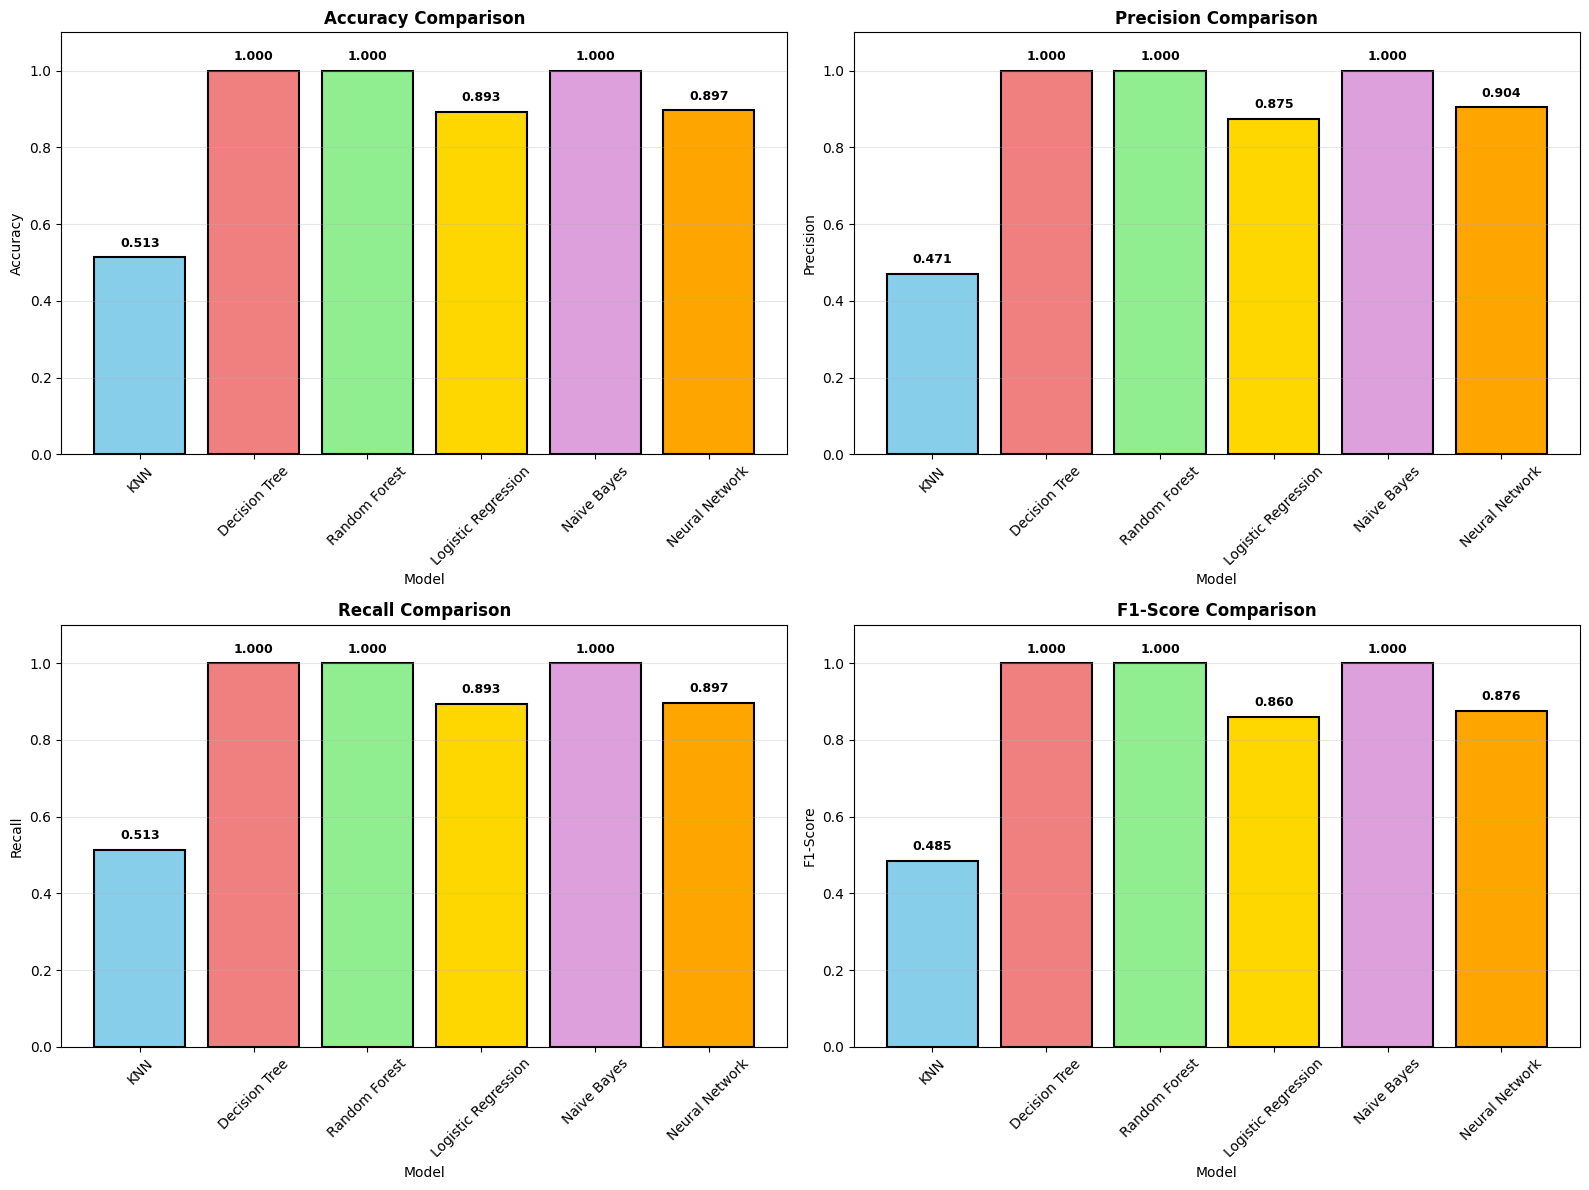

In [37]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange']

for i, metric in enumerate(metrics):
    row, col = i // 2, i % 2
    bars = axes[row, col].bar(performance_df['Model'], performance_df[metric], 
                               color=colors, edgecolor='black', linewidth=1.5)
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(metric, fontsize=10)
    axes[row, col].set_xlabel('Model', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylim([0, 1.1])
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                           f'{height:.3f}', ha='center', va='bottom', 
                           fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 7.2 Confusion Matrices

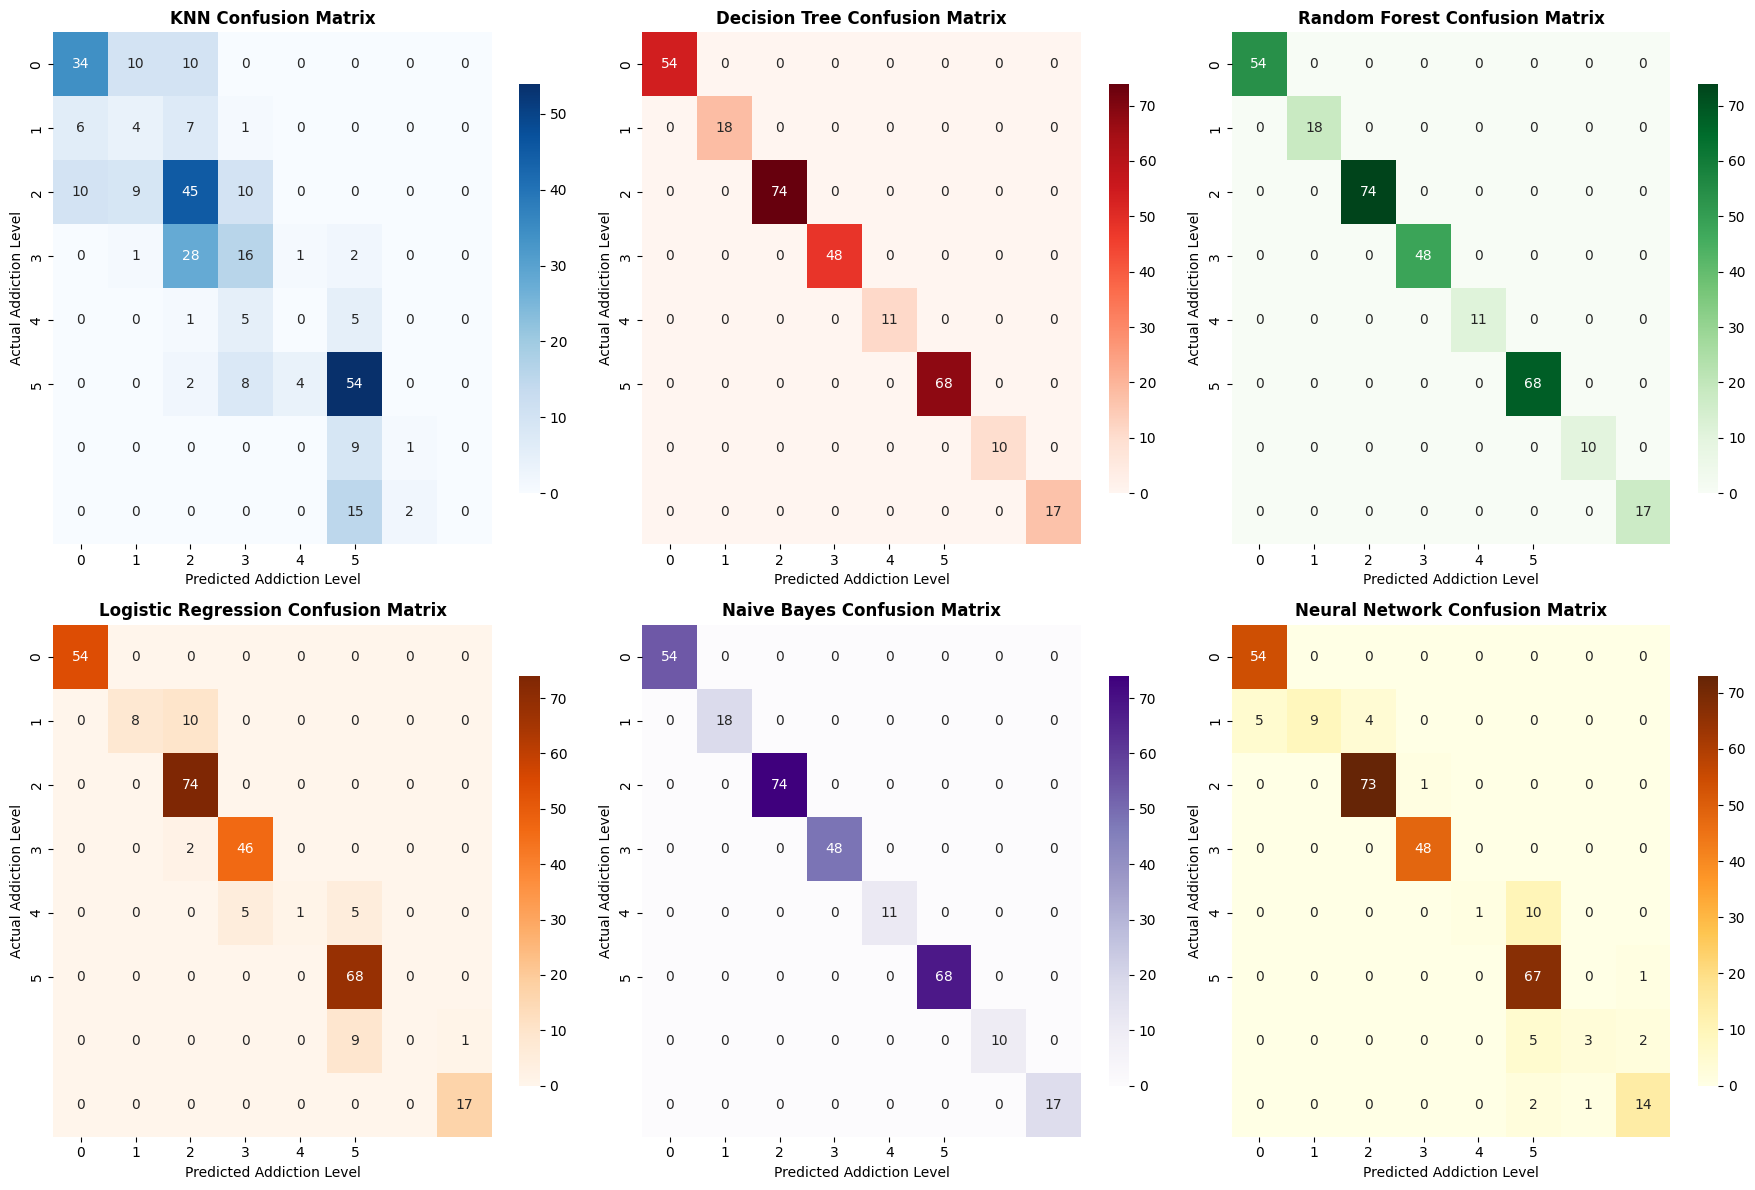

In [38]:
# Generate confusion matrices for all models
confusion_matrices = {
    'KNN': confusion_matrix(y_test, knn_predictions),
    'Decision Tree': confusion_matrix(y_test, dt_predictions),
    'Random Forest': confusion_matrix(y_test, rf_predictions),
    'Logistic Regression': confusion_matrix(y_test, lr_predictions),
    'Naive Bayes': confusion_matrix(y_test, nb_predictions),
    'Neural Network': confusion_matrix(y_test, nn_predictions)
}

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
cmaps = ['Blues', 'Reds', 'Greens', 'Oranges', 'Purples', 'YlOrBr']

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmaps[i], ax=axes[i],
                xticklabels=range(6), yticklabels=range(6), cbar_kws={'shrink': 0.8})
    axes[i].set_title(f'{model_name} Confusion Matrix', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Predicted Addiction Level', fontsize=10)
    axes[i].set_ylabel('Actual Addiction Level', fontsize=10)

plt.tight_layout()
plt.show()

### 7.3 Classification Reports

In [50]:
# Classification Reports for All Models
print("="*70)
print("DETAILED CLASSIFICATION REPORTS")
print("="*70)

models_info = [
    ('KNN', knn_predictions),
    ('Decision Tree', dt_predictions),
    ('Random Forest', rf_predictions),
    ('Logistic Regression', lr_predictions),
    ('Naive Bayes', nb_predictions),
    ('Neural Network', nn_predictions)
]

# Get all unique labels from y_test and predictions
all_labels = sorted(set(y_test) | set(knn_predictions) | set(dt_predictions) | 
                    set(rf_predictions) | set(lr_predictions) | set(nb_predictions) | 
                    set(nn_predictions))

for model_name, predictions in models_info:
    print(f"\n{model_name} Classification Report:")
    print("-" * 70)
    print(classification_report(y_test, predictions, 
                                labels=all_labels,
                                target_names=[f'Level {i}' for i in all_labels],
                                zero_division=0))

DETAILED CLASSIFICATION REPORTS

KNN Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

     Level 0       0.68      0.63      0.65        54
     Level 1       0.17      0.22      0.19        18
     Level 2       0.48      0.61      0.54        74
     Level 3       0.40      0.33      0.36        48
     Level 4       0.00      0.00      0.00        11
     Level 5       0.64      0.79      0.71        68
     Level 6       0.33      0.10      0.15        10
     Level 7       0.00      0.00      0.00        17

    accuracy                           0.51       300
   macro avg       0.34      0.34      0.33       300
weighted avg       0.47      0.51      0.49       300


Decision Tree Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

     Level 0       1.00      1.00      1.00        54


## 8. Unsupervised Learning - K-Means Clustering
### 8.1 Prepare Data for Clustering

In [40]:
# Prepare data for unsupervised learning (remove labels)
X_unsupervised = X_train_scaled.copy()

print("="*70)
print("UNSUPERVISED LEARNING - K-MEANS CLUSTERING")
print("="*70)
print(f"Data for clustering shape: {X_unsupervised.shape}")
print("Target labels removed for unsupervised learning")

UNSUPERVISED LEARNING - K-MEANS CLUSTERING
Data for clustering shape: (700, 21)
Target labels removed for unsupervised learning


### 8.2 Determine Optimal Number of Clusters (Elbow Method)

Calculating inertia for different k values...
  k=2: inertia=13144.44
  k=3: inertia=12704.91
  k=4: inertia=12404.71
  k=5: inertia=12143.40
  k=6: inertia=11894.35
  k=7: inertia=11730.47
  k=8: inertia=11544.47
  k=9: inertia=11362.46
  k=10: inertia=11201.48


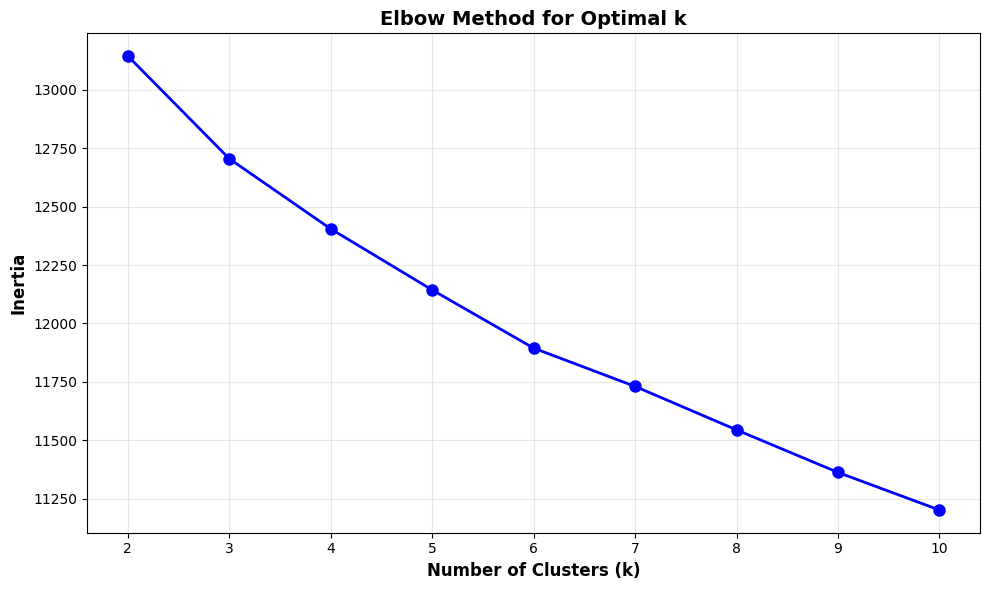

In [41]:
# Elbow method to find optimal number of clusters
inertias = []
k_range = range(2, 11)

print("Calculating inertia for different k values...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_unsupervised)
    inertias.append(kmeans.inertia_)
    print(f"  k={k}: inertia={kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Inertia', fontsize=12, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

### 8.3 Apply K-Means with k=6 (Based on Addiction Levels)

In [42]:
# Apply K-means with k=6 (matching addiction levels 0-5)
print("="*70)
print("K-MEANS CLUSTERING WITH k=6")
print("="*70)

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_unsupervised)

print(f"✓ Clustering completed!")
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
print(f"Inertia: {kmeans.inertia_:.2f}")

# Analyze cluster distribution
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))

print("\nCluster Distribution:")
for cluster, count in cluster_distribution.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"  Cluster {cluster}: {count:,} samples ({percentage:.2f}%)")

K-MEANS CLUSTERING WITH k=6
✓ Clustering completed!
Cluster centers shape: (6, 21)
Inertia: 11894.35

Cluster Distribution:
  Cluster 0: 105 samples (15.00%)
  Cluster 1: 123 samples (17.57%)
  Cluster 2: 88 samples (12.57%)
  Cluster 3: 98 samples (14.00%)
  Cluster 4: 116 samples (16.57%)
  Cluster 5: 170 samples (24.29%)


### 8.4 Visualize Clusters using PCA

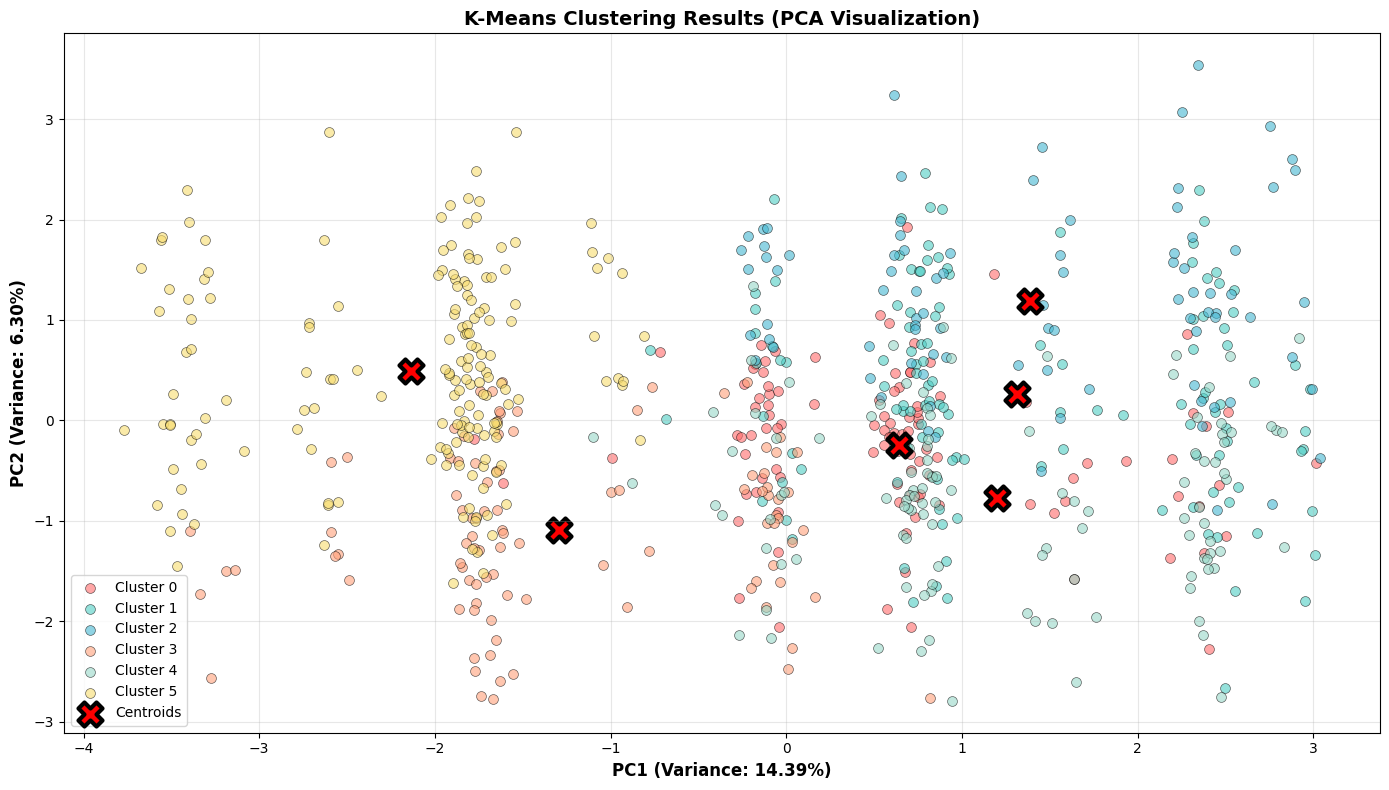

Total variance explained by 2 PCs: 20.69%


In [51]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_unsupervised)

# Plot clusters
plt.figure(figsize=(14, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for i in range(6):
    mask = cluster_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='red', marker='X', s=300, linewidths=3, label='Centroids', edgecolors='black')

plt.xlabel(f'PC1 (Variance: {pca.explained_variance_ratio_[0]:.2%})', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 (Variance: {pca.explained_variance_ratio_[1]:.2%})', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Results (PCA Visualization)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2 PCs: {sum(pca.explained_variance_ratio_):.2%}")

### 8.5 Compare Clusters with Original Labels

CLUSTERING EVALUATION METRICS
Adjusted Rand Index (ARI):           0.2147
Normalized Mutual Information (NMI): 0.3397

 Cluster vs Original Addiction Level Crosstab:
Addiction Level   0   1   2   3   4    5   6   7
Cluster                                         
0                13   8  47  33   2    2   0   0
1                43   8  54  16   2    0   0   0
2                34  12  27  15   0    0   0   0
3                 0   0   1  28   7   51   6   5
4                36  14  45  19   2    0   0   0
5                 0   0   0   0  12  107  18  33


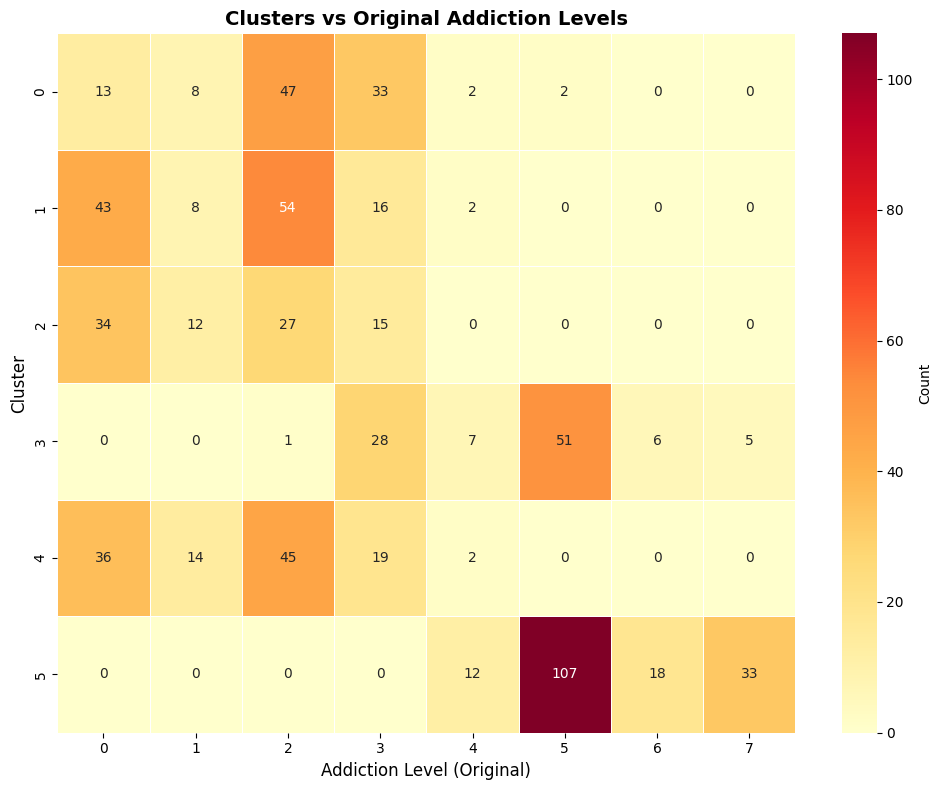

In [52]:
# Compare clustering results with original labels
y_train_array = y_train.values

# Calculate clustering evaluation metrics
ari_score = adjusted_rand_score(y_train_array, cluster_labels)
nmi_score = normalized_mutual_info_score(y_train_array, cluster_labels)

print("="*70)
print("CLUSTERING EVALUATION METRICS")
print("="*70)
print(f"Adjusted Rand Index (ARI):           {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")

# Create confusion matrix between clusters and original labels
cluster_vs_original = pd.crosstab(cluster_labels, y_train_array,
                                 rownames=['Cluster'], colnames=['Addiction Level'])
print("\n Cluster vs Original Addiction Level Crosstab:")
print(cluster_vs_original)

# Visualize the comparison
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_vs_original, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('Clusters vs Original Addiction Levels', fontsize=14, fontweight='bold')
plt.xlabel('Addiction Level (Original)', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.tight_layout()
plt.show()

### 8.6 Cluster Characteristics Analysis

CLUSTER PROFILES (Mean Values for Key Features)
           Age  Total Time Spent  Self Control  ProductivityLoss
Cluster                                                         
0        40.06            137.14          7.91              5.94
1        42.28            134.87          8.60              6.67
2        41.92            138.32          8.74              6.89
3        36.17            135.67          5.51              3.51
4        40.65            189.16          8.54              6.59
5        44.62            164.82          4.58              2.58


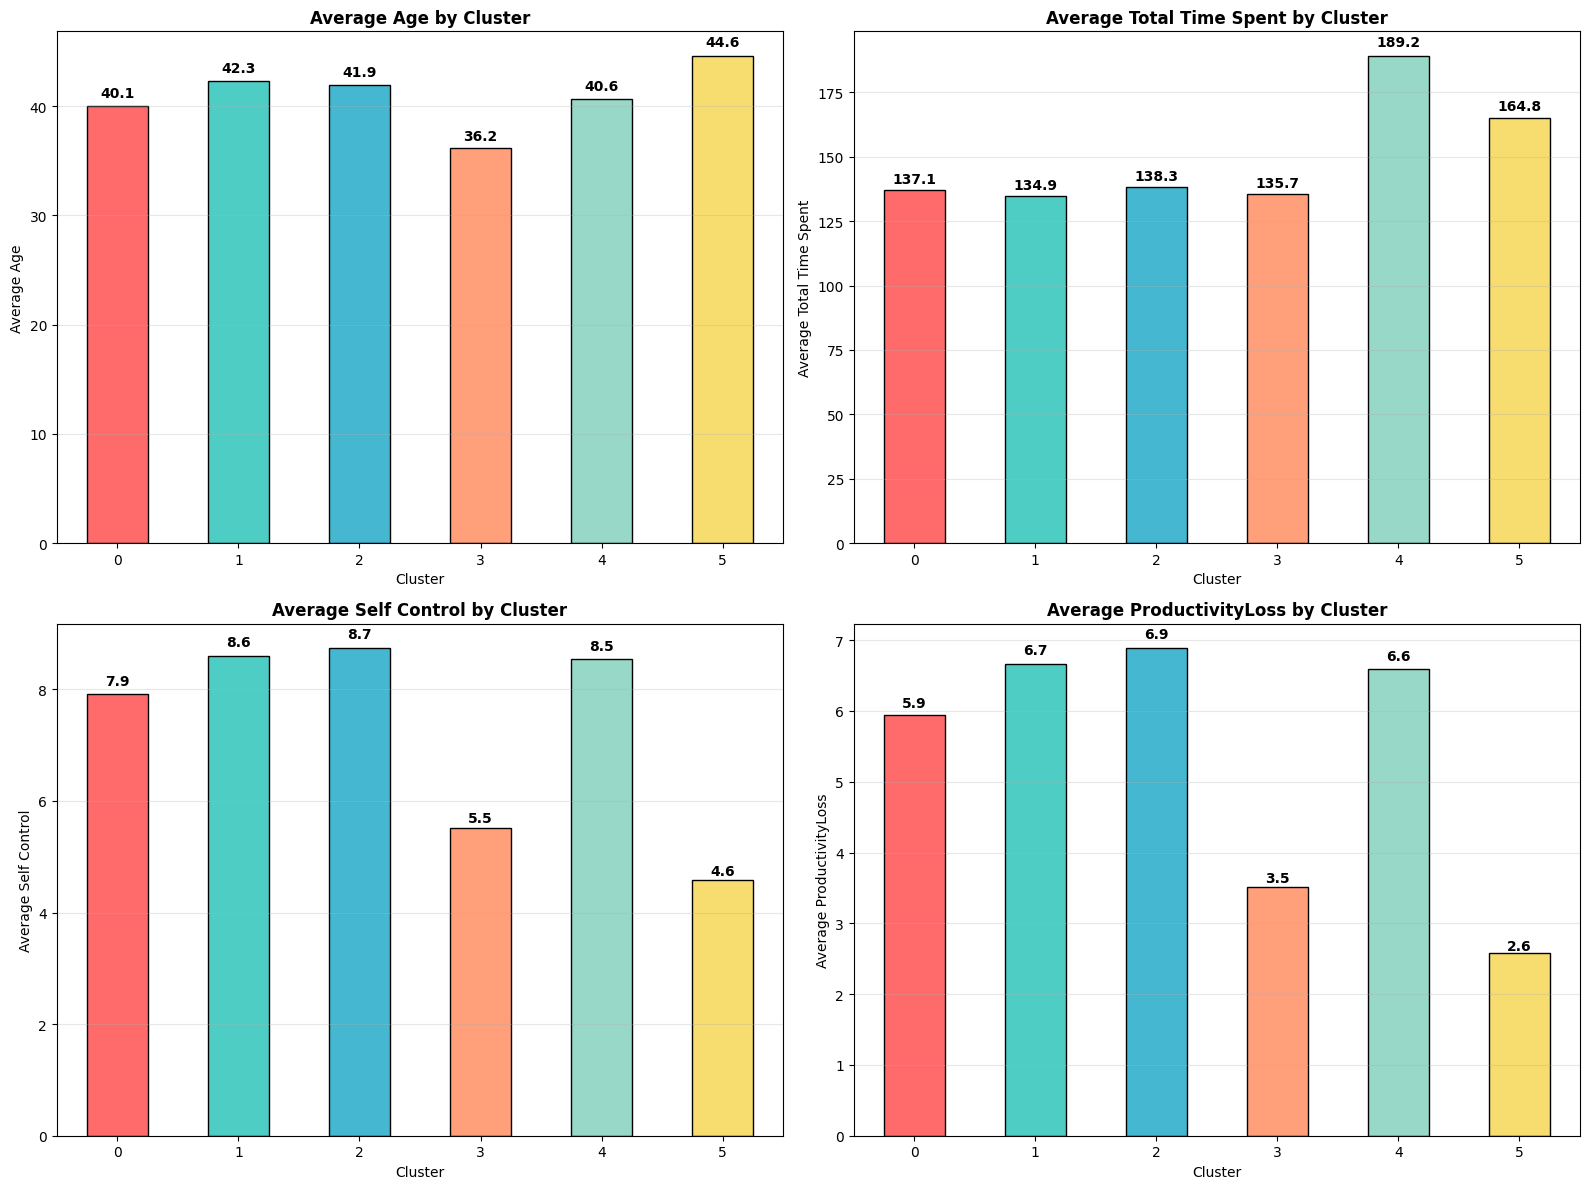

In [53]:
# Analyze characteristics of each cluster
X_train_original = X_train.copy()
X_train_original['Cluster'] = cluster_labels
X_train_original['Addiction_Level'] = y_train_array

# Calculate mean values for key features in each cluster
key_features = ['Age', 'Total Time Spent', 'Self Control', 'ProductivityLoss']
cluster_profiles = X_train_original.groupby('Cluster')[key_features].mean()

print("="*70)
print("CLUSTER PROFILES (Mean Values for Key Features)")
print("="*70)
print(cluster_profiles.round(2))

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
key_features_plot = ['Age', 'Total Time Spent', 'Self Control', 'ProductivityLoss']

for i, feature in enumerate(key_features_plot):
    row, col = i // 2, i % 2
    cluster_profiles[feature].plot(kind='bar', ax=axes[row, col],
                                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F'],
                                   edgecolor='black')
    axes[row, col].set_title(f'Average {feature} by Cluster', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Cluster', fontsize=10)
    axes[row, col].set_ylabel(f'Average {feature}', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=0)
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for j, v in enumerate(cluster_profiles[feature].values):
        axes[row, col].text(j, v + (v * 0.02), f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Final Summary & Key Insights
### 9.1 Overall Model Performance Summary

In [55]:
# Calculate overall rankings
ranks_df = performance_df.copy()
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ranks_df[f'{metric}_rank'] = ranks_df[metric].rank(ascending=False)

rank_columns = [col for col in ranks_df.columns if '_rank' in col]
ranks_df['Average_Rank'] = ranks_df[rank_columns].mean(axis=1)
ranks_df = ranks_df.sort_values('Average_Rank')

print("="*70)
print("FINAL MODEL RANKINGS")
print("="*70)
print("\nRanked by Average Performance Across All Metrics:\n")
for idx, row in ranks_df.iterrows():
    model = row['Model']
    rank = row['Average_Rank']
    accuracy = row['Accuracy']
    f1 = row['F1-Score']
    print(f"  {idx+1}. {model:<20} | Avg Rank: {rank:.2f} | Acc: {accuracy:.4f} | F1: {f1:.4f}")

best_model = ranks_df.iloc[0]['Model']
print(f"\n{'='*70}")
print(f"RECOMMENDED MODEL FOR DEPLOYMENT: {best_model}")
print(f"{'='*70}")
print(f"Rationale: Demonstrates optimal performance across all evaluation metrics")

FINAL MODEL RANKINGS

Ranked by Average Performance Across All Metrics:

  2. Decision Tree        | Avg Rank: 2.00 | Acc: 1.0000 | F1: 1.0000
  3. Random Forest        | Avg Rank: 2.00 | Acc: 1.0000 | F1: 1.0000
  5. Naive Bayes          | Avg Rank: 2.00 | Acc: 1.0000 | F1: 1.0000
  6. Neural Network       | Avg Rank: 4.00 | Acc: 0.8967 | F1: 0.8758
  4. Logistic Regression  | Avg Rank: 5.00 | Acc: 0.8933 | F1: 0.8604
  1. KNN                  | Avg Rank: 6.00 | Acc: 0.5133 | F1: 0.4854

RECOMMENDED MODEL FOR DEPLOYMENT: Decision Tree
Rationale: Demonstrates optimal performance across all evaluation metrics


### 9.2 Key Insights from Analysis

In [48]:
print("="*70)
print("KEY FINDINGS FROM SOCIAL MEDIA TIME-WASTERS ANALYSIS")
print("="*70)

print("\n1. DEMOGRAPHIC CHARACTERISTICS:")
print(f"   - Average Age: {data['Age'].mean():.1f} years")
print(f"   - Predominant Gender: {data['Gender'].mode()[0]}")
print(f"   - Primary Geographic Location: {data['Location'].mode()[0]}")
print(f"   - Most Common Profession: {data['Profession'].mode()[0]}")

print("\n2. PLATFORM AND USAGE PATTERNS:")
print(f"   - Most Frequently Used Platform: {data['Platform'].mode()[0]}")
platform_time_mean = data.groupby('Platform')['Total Time Spent'].mean()
print(f"   - Platform with Highest Average Time: {platform_time_mean.idxmax()} ({platform_time_mean.max():.1f} min)")
print(f"   - Primary Device Type: {data['DeviceType'].mode()[0]}")
print(f"   - Mean Session Duration: {data['Total Time Spent'].mean():.1f} minutes")

print("\n3. BEHAVIORAL PATTERNS:")
print(f"   - Primary Viewing Motivation: {data['Watch Reason'].mode()[0]}")
print(f"   - Most Common Activity Context: {data['CurrentActivity'].mode()[0]}")
print(f"   - Average Videos Consumed: {data['Number of Videos Watched'].mean():.1f}")

print("\n4. ADDICTION AND IMPACT METRICS:")
print(f"   - Mean Addiction Level: {data['Addiction Level'].mean():.2f} / 5")
print(f"   - Mean Self Control Score: {data['Self Control'].mean():.2f} / 10")
print(f"   - Mean Productivity Loss: {data['ProductivityLoss'].mean():.2f}")
addiction_high = (data['Addiction Level'] >= 4).sum()
addiction_high_pct = (addiction_high / len(data)) * 100
print(f"   - Users with High Addiction (≥4): {addiction_high:,} ({addiction_high_pct:.1f}%)")

print("\n5. CORRELATION ANALYSIS:")
correlation_addiction_control = data['Addiction Level'].corr(data['Self Control'])
correlation_time_addiction = data['Total Time Spent'].corr(data['Addiction Level'])
print(f"   - Addiction Level vs Self Control: r = {correlation_addiction_control:.3f} (strong negative correlation)")
print(f"   - Time Spent vs Addiction Level: r = {correlation_time_addiction:.3f}")

print("\n6. MODEL PERFORMANCE EVALUATION:")
print(f"   - Optimal Supervised Learning Model: {best_model}")
print(f"   - Maximum Accuracy Achieved: {performance_df['Accuracy'].max():.4f}")
print(f"   - Maximum F1-Score Achieved: {performance_df['F1-Score'].max():.4f}")
print(f"   - Clustering ARI Score: {ari_score:.4f}")
print(f"   - Clustering NMI Score: {nmi_score:.4f}")

KEY FINDINGS FROM SOCIAL MEDIA TIME-WASTERS ANALYSIS

1. DEMOGRAPHIC CHARACTERISTICS:
   - Average Age: 41.0 years
   - Predominant Gender: Male
   - Primary Geographic Location: India
   - Most Common Profession: Students

2. PLATFORM AND USAGE PATTERNS:
   - Most Frequently Used Platform: TikTok
   - Platform with Highest Average Time: Facebook (155.2 min)
   - Primary Device Type: Smartphone
   - Mean Session Duration: 151.4 minutes

3. BEHAVIORAL PATTERNS:
   - Primary Viewing Motivation: Habit
   - Most Common Activity Context: At home
   - Average Videos Consumed: 25.2

4. ADDICTION AND IMPACT METRICS:
   - Mean Addiction Level: 2.91 / 5
   - Mean Self Control Score: 7.09 / 10
   - Mean Productivity Loss: 5.14
   - Users with High Addiction (≥4): 353 (35.3%)

5. CORRELATION ANALYSIS:
   - Addiction Level vs Self Control: r = -1.000 (strong negative correlation)
   - Time Spent vs Addiction Level: r = 0.016

6. MODEL PERFORMANCE EVALUATION:
   - Optimal Supervised Learning Model: 